# Data Understanding

# Inhouds opgaven data understanding

## 1. Libraries
## 2. Data Import
## 3. Globale Overzicht Data
    3.1 Eerste Overzicht
    3.2 Type Overzicht 
    3.3 Verdeling Overzicht
    3.4 Na's Overzicht
    3.5 De Meetniveau's Overzicht
    3.6 Correlatie Overzicht 
    3.7 Conclusie Globale Overzicht
## 4. Kolommen Redundantie Onderzoek
    4.1 Redundante Kolommen
    4.2 Datatime Kolommen
    4.3 Business Understanding Toepassing
    4.4 Duplicaten rijen
    4.5 Dtype Kolommen
    4.6 Bijvoegen kollommen 
    4.7 Na Kolommen
    
## 5. Target variabele: Functie hersteltijd
    5.1 Overzicht functie hersteltijd duur
    5.2 Verdeling functie hersteltijd duur
## 6. Feature variabele Discrete en Continu
    6.1 Overzicht discreete en ratio feature variabele
    6.2 Functie herstel prognose 
    6.3 Melding melding gebeld

## 7. Feature variabele Nominaal
    7.1 Overzicht Nominaal variabele
    7.2 Oorzaak groep
    7.3 Oorzaak code
    7.4 Equipment nummer
    7.5 Equipment soort
    7.6 Prioriteit
    7.7 Techniek melding
    7.8 Mee genomen features


## 1. Libraries

Importeren van de benodigde libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from category_encoders import LeaveOneOutEncoder
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Data Import

Hieronder importeren we het CSV bestand. We hebben alle kolommen die in de geleverde data dictionary als NVT aangemerkt zijn weggelaten doormiddel van een Exclusion List. Dit scheelt een hele hoop memory en zorgt dat we de gehele datset kunnen importeren zonder tegen memory issues aan te lopen. 

In [2]:
cols = list(pd.read_csv("sap_storing_data_hu_project.csv", nrows =1))
exclusion_list = ['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt','stm_mon_toelichting_trdl','stm_oh_pg_mld', 'stm_scenario_mon','stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst','stm_progfh_in_ddt','stm_progfh_in_invoer_ddt','stm_progfh_gw_ddt','stm_progfh_gw_lwd_ddt','stm_progfh_hz','stm_veroorz_groep','stm_veroorz_code','stm_veroorz_tekst_kort','stm_effect', 'stm_afspr_aanvangddt','stm_mon_eind_ddt','stm_mon_vhdsincident','stm_dir_betrok_tr','stm_aangelegd_dd','stm_aangelegd_tijd','stm_mon_begindatum','stm_mon_begintijd','stm_progfh_gw_datum','stm_progfh_gw_lwd_datum','stm_progfh_gw_lwd_tijd','stm_progfh_gw_duur','stm_afspr_aanvangdd','stm_afspr_aanvangtijd','stm_afspr_aanvangtijd','stm_mon_eind_tijd','stm_controle_dd','stm_akkoord_mon_toewijz','stm_status_sapnaarmon','stm_fact_jn','stm_akkoord_melding_jn','stm_afsluit_ddt','stm_afsluit_dd','stm_afsluit_tijd','stm_rec_toegev_ddt','stm_hinderwaarde','stm_actie','stm_standplaats','stm_status_gebr','stm_wbi_nummer','stm_projnr','stm_historie_toelichting','stm_schade_verhaalb_jn','stm_schadenr','stm_schade_status_ga','stm_schade_statusdatum','stm_relatiervo_vorig','stm_relatiervo_volgend','stm_relatiervo','stm_afspr_func_hersteldd','stm_afspr_func_hersteltijd','stm_sorteerveld','stm_rapportage_maand','stm_rapportage_jaar','stm_x_bron_publ_dt','stm_x_bron_bestandsnaam','stm_x_bron_arch_dt','stm_x_actueel_ind','stm_x_run_id','stm_x_bk','stm_x_start_sessie_dt','stm_x_vervallen_ind']
table = pd.read_csv('sap_storing_data_hu_project.csv', low_memory=False, usecols=[i for i in cols if i not in exclusion_list])
table.columns

Index(['Unnamed: 0', '#stm_sap_meldnr', 'stm_mon_nr', 'stm_vl_post',
       'stm_sap_meld_ddt', 'stm_sap_meldtekst_lang', 'stm_sap_meldtekst',
       'stm_geo_mld', 'stm_geo_mld_uit_functiepl', 'stm_equipm_nr_mld',
       'stm_equipm_soort_mld', 'stm_equipm_omschr_mld', 'stm_km_van_mld',
       'stm_km_tot_mld', 'stm_prioriteit', 'stm_status_melding_sap',
       'stm_aanngeb_ddt', 'stm_aanntpl_ddt', 'stm_oh_pg_gst', 'stm_geo_gst',
       'stm_geo_gst_uit_functiepl', 'stm_equipm_nr_gst',
       'stm_equipm_soort_gst', 'stm_equipm_omschr_gst', 'stm_km_van_gst',
       'stm_km_tot_gst', 'stm_oorz_groep', 'stm_oorz_code', 'stm_oorz_tkst',
       'stm_fh_ddt', 'stm_fh_status', 'stm_sap_storeind_ddt',
       'stm_tao_indicator', 'stm_tao_indicator_vorige',
       'stm_tao_soort_mutatie', 'stm_tao_telling_mutatie',
       'stm_tao_beinvloedbaar_indicator', 'stm_evb', 'stm_sap_melddatum',
       'stm_sap_meldtijd', 'stm_contractgeb_mld', 'stm_functiepl_mld',
       'stm_techn_mld', 'stm_contra

Hier boven zijn de kolommen te zien waar we verder onderzoek naar gaan doen. Op eerste gezicht is er in de benaming all te zien dat er kollom tussen zullen zitten die niet relevant zijn voor het onderzoek neem bijvoorbeeld 'stm_sap_meldtekst_lang' en'stm_sap_meldtekst'.

In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

 We passen de settings aan zodat alle colomen en meer rows getoond worden.

## 3. Globale Overzicht Data 

#### 3.1 Eerste Overzicht

We gaan hier eerst kijken naar het globale overzicht van de data. Op eerste gezicht lijken een paar tabellen zeer op elkaar, qua benaming en waardes. Neem 'stm_geo_mld' en 'stm_geo_mld_uit_functiepl' als voorbeeld waarin te zien is dat ze de zelfde waardes hebben. We gaan dit later verder ontleden, op deze manier kunnen we redundantie en memory gebruik zo laag mogelijk houden en krijgen we een beter overzicht van de data.

In [4]:
table.head(5)

Unnamed: 0  #stm_sap_meldnr  stm_mon_nr stm_vl_post     stm_sap_meld_ddt  \
0          0                0         NaN         NaN                  NaN   
1          1         50053211         0.0         NaN  02/01/2006 09:00:00   
2          2         50053213        48.0          GN  02/01/2006 12:35:00   
3          3         50053214        72.0          ZL  02/01/2006 16:40:00   
4          4         50053215        96.0          ZL  02/01/2006 22:30:00   

                              stm_sap_meldtekst_lang  \
0                                                NaN   
1   Logboeknr  Geeltje  :   49 Tijd: 0900   VL-Po...   
2   Logboeknr  RBV  :   48 Tijd: 1235   VL-Post: ...   
3   Logboeknr  RBV  :   72 Tijd: 1640   VL-Post: ...   
4   Logboeknr  RBV  :   96 Tijd: 2230   VL-Post: ...   

                          stm_sap_meldtekst stm_geo_mld  \
0                                       NaN         NaN   
1     Logboeknr  Geeltje  :   49 Tijd: 0900       624.0   
2  Logboeknr  RBV  :   48 Tijd: 1235   VL-P       201.0   
3  Logboeknr  RBV  :   72 Tijd: 1640   VL-P        25.0   
4  Logboeknr  RBV  :   96 Tijd: 2230   VL-P        12.0   

   stm_geo_mld_uit_functiepl  stm_equipm_nr_mld stm_equipm_soort_mld  \
0                        NaN                NaN                  NaN   
1                      624.0                NaN                  NaN   
2                      201.0                NaN                  NaN   
3                       25.0                NaN                  NaN   
4                       12.0                NaN                  NaN   

  stm_equipm_omschr_mld  stm_km_van_mld  stm_km_tot_mld  stm_prioriteit  \
0                   NaN             NaN             NaN             NaN   
1                   NaN             0.0             0.0             9.0   
2                   NaN             0.0             0.0             9.0   
3                   NaN             0.0             0.0             9.0   
4                   NaN             0.0             0.0             9.0   

  stm_status_melding_sap      stm_aanngeb_ddt stm_aanntpl_ddt stm_oh_pg_gst  \
0                    NaN                  NaN             NaN           NaN   
1              MAFS MAFD  02/01/2006 09:00:00             NaN           81S   
2                   MAFS  02/01/2006 12:35:00             NaN           37B   
3              MAFS MAFD  02/01/2006 16:40:00             NaN           32B   
4                   MAFS  02/01/2006 22:30:00             NaN           35B   

  stm_geo_gst  stm_geo_gst_uit_functiepl  stm_equipm_nr_gst  \
0         NaN                        NaN                NaN   
1       624.0                      624.0                NaN   
2       201.0                      201.0                NaN   
3        25.0                       25.0                NaN   
4        12.0                       12.0                NaN   

  stm_equipm_soort_gst stm_equipm_omschr_gst  stm_km_van_gst  stm_km_tot_gst  \
0                  NaN                   NaN             NaN             NaN   
1                  NaN                   NaN             0.0             0.0   
2                  NaN                   NaN         30200.0             0.0   
3                  NaN                   NaN         14000.0             0.0   
4                  NaN                   NaN         19819.0             0.0   

  stm_oorz_groep  stm_oorz_code        stm_oorz_tkst           stm_fh_ddt  \
0            NaN            NaN                  NaN                  NaN   
1        ONR-RIB          133.0   Papieren ontbreken  02/01/2006 09:00:00   
2       ONR-DERD          143.0                  NaN  02/01/2006 13:26:00   
3       ONR-DERD          142.0                  NaN  02/01/2006 17:20:00   
4       ONR-DERD          142.0                  NaN  02/01/2006 22:36:00   

   stm_fh_status stm_sap_storeind_ddt stm_tao_indicator  \
0            NaN                  NaN                 N   
1            4.0  02/01/2006 09:00:00    

#### 3.2 Type Overzicht

Als we kijken naar wat voor waardes er in onze dataset zitten zien we opvallend veel 'objects'. Als we kijken naar de benaming van veel van deze 'objects' zien we dat ze te maken hebben met datum of tijd. Dit verklaart waarom ze niet als een float of integer worden gezien. Later gaan wij deze waardes omzetten naar hun echte waardes, zodat we met ze kunnen werken.

In [5]:
table.dtypes

Unnamed: 0              object
#stm_sap_meldnr          int64
stm_mon_nr             float64
stm_vl_post             object
stm_sap_meld_ddt        object
                        ...   
stm_oorz_tekst_kort     object
stm_pplg_van            object
stm_pplg_naar           object
stm_dstrglp_van         object
stm_dstrglp_naar        object
Length: 70, dtype: object

#### 3.3 Verdeling Overzicht

Hier onder gaan we kijken of er op eerste gezicht verdeling te bepalen zijn. Er valt op dat veel kolommen hoge waardes hebben.  Hieruit kunnen we concluderen dat de data of veel uitschieters bevatten of geen kwantitatieve waardes zijn.

In [6]:
table.describe()

#stm_sap_meldnr    stm_mon_nr  stm_geo_mld_uit_functiepl  \
count     8.985260e+05  8.985250e+05              884926.000000   
mean      7.510690e+07  9.163174e+05                 335.005622   
std       1.113009e+07  1.588361e+06                 274.906052   
min       0.000000e+00  0.000000e+00                   0.000000   
25%       8.035472e+07  0.000000e+00                  85.000000   
50%       8.063615e+07  0.000000e+00                 208.000000   
75%       8.079029e+07  1.404624e+06                 551.000000   
max       1.000000e+08  5.748960e+06                 952.000000   

       stm_equipm_nr_mld  stm_km_van_mld  stm_km_tot_mld  stm_prioriteit  \
count       6.611260e+05    8.985220e+05    8.985220e+05   898365.000000   
mean        1.064512e+07    3.536605e+04    1.594005e+04        4.582593   
std         4.748398e+05    2.294758e+05    4.969935e+04        2.262522   
min         1.000001e+07    0.000000e+00    0.000000e+00        1.000000   
25%         1.022028e+07    0.000000e+00    0.000000e+00        2.000000   
50%         1.059635e+07    1.702900e+04    0.000000e+00        4.000000   
75%         1.095769e+07    4.463000e+04    1.514200e+04        5.000000   
max         3.039590e+07    6.084449e+07    4.221399e+06        9.000000   

       stm_geo_gst_uit_functiepl  stm_equipm_nr_gst  stm_km_van_gst  \
count              741568.000000       6.057210e+05    8.985210e+05   
mean                  321.455539       1.062666e+07    2.664714e+04   
std                   270.687469       4.755891e+05    7.841763e+04   
min                     0.000000       1.000001e+07    0.000000e+00   
25%                    79.000000       1.021172e+07    0.000000e+00   
50%                   203.000000       1.056452e+07    5.000000e+03   
75%                   545.000000       1.092778e+07    3.751500e+04   
max                   952.000000       3.039590e+07    3.096056e+07   

       stm_km_tot_gst  stm_oorz_code  stm_fh_status  stm_tao_telling_mutatie  \
count    8.985210e+05  845113.000000  747318.000000            898526.000000   
mean     1.245256e+04     193.577248       1.802484                 0.143858   
std      6.410697e+04      48.310779       1.182432                 0.373983   
min      0.000000e+00      33.000000       1.000000                -1.000000   
25%      0.000000e+00     144.000000       1.000000                 0.000000   
50%      0.000000e+00     213.000000       1.000000                 0.000000   
75%      0.000000e+00     221.000000       2.000000                 0.000000   
max      3.096056e+07     999.000000       9.000000                 1.000000   

       stm_contractgeb_mld  stm_contractgeb_gst    stm_arbeid  \
count        661017.000000        898303.000000  8.984880e+05   
mean             25.261916            25.117415  3.976436e+06   
std              19.725904            19.444268  1.990988e+07   
min               0.000000             0.000000 -1.167950e+05   
25%               9.000000             9.000000  0.000000e+00   
50%              22.000000            23.000000  3.000000e+00   
75%              33.000000            32.000000  4.700000e+01   
max              99.000000            99.000000  1.057679e+09   

       stm_progfh_gw_teller    stm_fh_duur  stm_reactie_duur  
count         898488.000000  898488.000000      8.984880e+05  
mean               0.201329     923.148771      8.845657e+07  
std                0.498747    6404.546787      2.712747e+08  
min                0.000000       0.000000      0.000000e+00  
25%                0.000000      11.000000      1.800000e+01  
50%                0.000000      84.000000      6.700000e+01  
75%                0.000000     256.000000      1.318000e+03  
max              150.000000  528297.000000      1.060469e+09

#### 3.4 Na's Overzicht

Hieronder bekijken we de NA's waardes. Zoals we kunnen zien zijn er bij de meeste tabellen vrij veel NA's waardes. En er zijn sommige die er minder dan 10 hebben, wat opvalt is dat dit tabellen zijn die met afstanden zoals km te maken hebben. Wat ook opmerkelijk is dat de tabellen gerelateerd aan tijd en/of datum 38 NA's hebben. 

In [7]:
table.isna().sum()

Unnamed: 0                  0
#stm_sap_meldnr             0
stm_mon_nr                  1
stm_vl_post            588027
stm_sap_meld_ddt            1
                        ...  
stm_oorz_tekst_kort    509896
stm_pplg_van           643777
stm_pplg_naar          838138
stm_dstrglp_van        589042
stm_dstrglp_naar       532766
Length: 70, dtype: int64

We gaan kijken of we kunnen achterhalen waarom bepaalde kolommen hoge aantal Na's waardes hebben in vergelijking tot de andere kolommen. 

In [8]:
table['stm_km_van_gst'].sort_values()

1         0.0
470413    0.0
470412    0.0
470409    0.0
470402    0.0
         ... 
0         NaN
261492    NaN
896775    NaN
896793    NaN
898179    NaN
Name: stm_km_van_gst, Length: 898526, dtype: float64

De rede dat er zo weinig Na's waardes zitten in de tabellen is omdat ze worden ingevuld met '0.0'. We kijken of de hoeveelheid 0's ongeveer overheen komt met het gemiddelde aantal NA's als in de andere tabellen.

In [9]:
print('NaN mean:', table.isna().sum().mean())
print(table['stm_km_van_gst'].value_counts())

NaN mean: 147618.1857142857
0.0         397523
80140.0       4175
34930.0       3127
84200.0       2827
80780.0       2676
             ...  
102008.0         1
39442.0          1
47275.0          1
35348.0          1
16487.0          1
Name: stm_km_van_gst, Length: 35335, dtype: int64


In [10]:
print(table['stm_fh_duur'].value_counts())

0.0        171713
5.0          6825
3.0          6389
6.0          5599
7.0          5389
            ...  
9968.0          1
10139.0         1
27023.0         1
36263.0         1
72214.0         1
Name: stm_fh_duur, Length: 16930, dtype: int64


Hieruit kunnen we zien dat een groot deel van de data opgevuld is met 0 wat later geïnterpreteerd kan worden als NaN waardes. Verder kunnen we hier onder zien dat er geen een kolommen zijn is waar 0 waarde niet missen.

In [11]:
table.dropna()

Empty DataFrame
Columns: [Unnamed: 0, #stm_sap_meldnr, stm_mon_nr, stm_vl_post, stm_sap_meld_ddt, stm_sap_meldtekst_lang, stm_sap_meldtekst, stm_geo_mld, stm_geo_mld_uit_functiepl, stm_equipm_nr_mld, stm_equipm_soort_mld, stm_equipm_omschr_mld, stm_km_van_mld, stm_km_tot_mld, stm_prioriteit, stm_status_melding_sap, stm_aanngeb_ddt, stm_aanntpl_ddt, stm_oh_pg_gst, stm_geo_gst, stm_geo_gst_uit_functiepl, stm_equipm_nr_gst, stm_equipm_soort_gst, stm_equipm_omschr_gst, stm_km_van_gst, stm_km_tot_gst, stm_oorz_groep, stm_oorz_code, stm_oorz_tkst, stm_fh_ddt, stm_fh_status, stm_sap_storeind_ddt, stm_tao_indicator, stm_tao_indicator_vorige, stm_tao_soort_mutatie, stm_tao_telling_mutatie, stm_tao_beinvloedbaar_indicator, stm_evb, stm_sap_melddatum, stm_sap_meldtijd, stm_contractgeb_mld, stm_functiepl_mld, stm_techn_mld, stm_contractgeb_gst, stm_functiepl_gst, stm_techn_gst, stm_aanngeb_dd, stm_aanngeb_tijd, stm_aanntpl_dd, stm_aanntpl_tijd, stm_arbeid, stm_progfh_in_datum, stm_progfh_in_tijd, stm_progfh_in_invoer_dat, stm_progfh_in_invoer_tijd, stm_progfh_in_duur, stm_progfh_gw_tijd, stm_progfh_gw_teller, stm_fh_dd, stm_fh_tijd, stm_fh_duur, stm_reactie_duur, stm_sap_storeinddatum, stm_sap_storeindtijd, stm_mon_eind_datum, stm_oorz_tekst_kort, stm_pplg_van, stm_pplg_naar, stm_dstrglp_van, stm_dstrglp_naar]
Index: []

#### 3.5 De Meetniveau's Overzicht

We gaan hier onder bepalen wat de meetwaardes zijn voor iedere kolom.

In [12]:
table.sample(3)

Unnamed: 0  #stm_sap_meldnr  stm_mon_nr stm_vl_post  \
544866     551813         80723500         0.0         NaN   
127936     132099         50163472   5120902.0         GVC   
309495     315663         80460461    346535.0          GN   

           stm_sap_meld_ddt  \
544866  22/06/2013 14:08:00   
127936  13/07/2018 13:03:00   
309495  16/06/2008 11:41:00   

                                   stm_sap_meldtekst_lang  \
544866       Nh : Ovp 11.7 gestoord.(1x) [ANALYSE : GEEN]   
127936               Gvm-Vst : Km 55.7 hert langs de baan   
309495   Dz.Stamlijn.Overweg 100.4 wil niet gesleuteld...   

                               stm_sap_meldtekst stm_geo_mld  \
544866  Nh : Ovp 11.7 gestoord.(1x) [ANALYSE : G          64   
127936      Gvm-Vst : Km 55.7 hert langs de baan         104   
309495  Dz.Stamlijn.Overweg 100.4 wil niet gesle         803   

        stm_geo_mld_uit_functiepl  stm_equipm_nr_mld stm_equipm_soort_mld  \
544866                       64.0         10145413.0              OVERWEG   
127936                      104.0         11563934.0            PLAATSBEP   
309495                      803.0         10211256.0              OVERWEG   

                 stm_equipm_omschr_mld  stm_km_van_mld  stm_km_tot_mld  \
544866   Ovp 11.7 Std-Hrl Overpad Nuth         11792.0             0.0   
127936     Plaatsbepaling 104 Ledn-Gvm         55700.0         55700.0   
309495  Aki 100.4 Handelskade Oost Dzh        100466.0             0.0   

        stm_prioriteit stm_status_melding_sap      stm_aanngeb_ddt  \
544866             4.0                   MINB  22/06/2013 14:12:00   
127936             9.0                   MAFS                  NaN   
309495             5.0                   MAFS  16/06/2008 11:42:00   

            stm_aanntpl_ddt stm_oh_pg_gst stm_geo_gst  \
544866  24/06/2013 07:38:00           26S        64.0   
127936                  NaN           01O         104   
309495  16/06/2008 13:42:00           37S       803.0   

        stm_geo_gst_uit_functiepl  stm_equipm_nr_gst stm_equipm_soort_gst  \
544866                       64.0         10145413.0              OVERWEG   
127936                      104.0         11563934.0            PLAATSBEP   
309495                      803.0         10211256.0              OVERWEG   

                 stm_equipm_omschr_gst  stm_km_van_gst  stm_km_tot_gst  \
544866   Ovp 11.7 Std-Hrl Overpad Nuth         11792.0             0.0   
127936     Plaatsbepaling 104 Ledn-Gvm             0.0             0.0   
309495  Aki 100.4 Handelskade Oost Dzh        100466.0             0.0   

       stm_oorz_groep  stm_oorz_code  \
544866        TECHONV          298.0   
127936       ONR-DERD          143.0   
309495        TECHONV          218.0   

                                            stm_oorz_tkst  \
544866   Gestoord object: OVERWEG 11.7. Gestoord onder...   
127936                                 hert langs de baan   
309495   Gestoord object: OVERWEG 100.466. Gestoord on...   

                 stm_fh_ddt  stm_fh_status stm_sap_storeind_ddt  \
544866  24/06/2013 07:40:00            4.0  24/06/2013 07:40:00   
127936                  NaN            NaN                  NaN   
309495  16/06/2008 13:45:00            1.0  16/06/2008 13:45:00   

       stm_tao_indicator stm_tao_indicator_vorige stm_tao_soort_mutatie  \
544866                 N                      NaN                   NaN   
127936                 J                        J           Ongewijzigd   
309495                 N                      NaN                   NaN   

        stm_tao_telling_mutatie stm_tao_beinvloedbaar_indicator stm_evb  \
544866                        0                               B    0,00   
127936                        0                              NB    0,00   
309495                        0                               B    0,00   

       stm_sap_melddatum stm_sap_meldtijd  stm_contractgeb_mld  \
544866        22/06/2013         14:08:00                 26.0   


We gaan hier de meetniveau ‘s van de variabelen bepalen op inzicht van de data hier boven met bussnins understanding.

- Nominaal: Unnamed, stm_sap_meldnr, stm_mon_nr, stm_vl_post, stm_sap_meldtekst_lang, stm_sap_meldtekst, stm_geo_mld, stm_geo_mld_uit_functiepl, stm_equipm_nr_mld, stm_equipm_soort_mld, stm_equipm_omschr_mld, stm_prioriteit, stm_status_melding_sap, stm_oh_pg_gst, stm_geo_gst, stm_geo_gst_uit_functiepl, stm_equipm_nr_gst, stm_equipm_soort_gst, stm_equipm_omschr_gst, stm_oorz_groep, stm_oorz_code, stm_oorz_tkst, stm_fh_status, stm_tao_indicator, stm_tao_indicator_vorige, stm_tao_soort_mutatie, stm_contractgeb_mld, stm_arbeid, stm_functiepl_mld, stm_techn_mld, stm_contractgeb_gst, stm_functiepl_gst, stm_functiepl_gst, stm_techn_gst, stm_arbeid, stm_oorz_tekst_kort, stm_pplg_van, stm_pplg_naar, stm_dstrglp_van, stm_dstrglp_naar, stm_tao_beinvloedbaar_indicator

- Ordinaal: -

- Discreet: stm_sap_melddatum, stm_sap_meld_ddt, stm_aanngeb_ddt, stm_aanntpl_ddt, stm_tao_telling_mutatie, stm_sap_meld_ddt, stm_sap_storeind_ddt, stm_sap_meldtijd, stm_aanngeb_tijd, stm_aanngeb_dd, stm_aanntpl_dd, stm_aanntpl_tijd, stm_progfh_in_datum, stm_progfh_in_tijd, stm_progfh_in_invoer_dat, stm_progfh_in_invoer_tijd, stm_progfh_gw_tijd, stm_progfh_gw_teller, stm_fh_dd, stm_fh_tijd, stm_sap_storeinddatum, stm_sap_storeindtijd, stm_mon_eind_datum, stm_fh_ddt

- Continu: stm_km_van_mld, stm_km_tot_mld, stm_km_van_gst, stm_km_tot_gst, stm_evb, stm_fh_duur, stm_reactie_duur, stm_progfh_in_duur	

#### 3.6 Correlatie Overzicht 

Voor de kolommen waar het van toepassing is gaan we kijken of we een correlatie kunnen vinden. 

<AxesSubplot:>

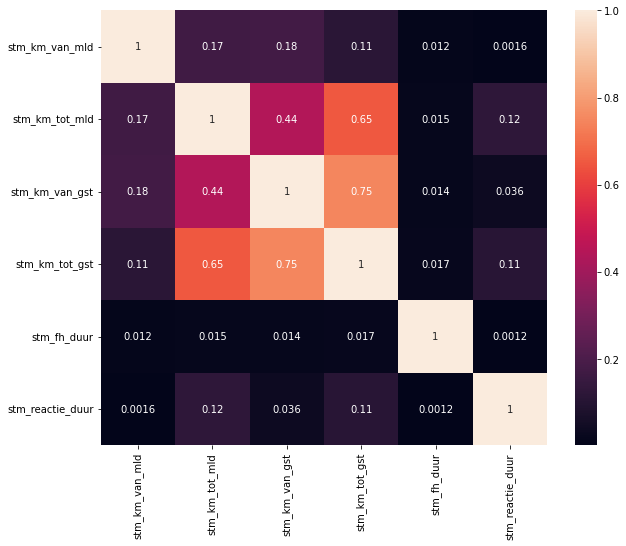

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(table[['stm_km_van_mld', 'stm_km_tot_mld', 'stm_km_van_gst', 'stm_km_tot_gst', 'stm_fh_duur', 'stm_evb', 'stm_reactie_duur', 'stm_progfh_in_duur']].corr(), annot=True, ax=ax)

Op eerste gezicht kunnen we geen corrolatie vinden van boven de 1.7 %

#### 3.7 Conclusie Globale Overzicht

Op eerste gezicht is er te zien dat we hier te maken hebben met veel Kwalitatieve (nominale) waardes. Daarnaast hebben de continue waardes die er zijn weinig correlatie met elkaar. Er zal verder onderzoek gedaan moeten worden in de nominale kolommen om er achter te komen of ze van belang zijn.  

## 4. Kolommen Redundantie Onderzoek

In dit hoofstuk gaan we kijken naar de verschillende kolommen en de duplicaten of redundante informatie. Hier door kunnen we een beter overzicht krijgen over de data die er beschikbaar is.

#### 4.1 Redundante Kolommen 

Hier onder nemen we een kijk of er op eerst oogopslag redundante kolommen aanwezig zijn. Dit wordt gedaan om de memory verbruik te verminderen en een beter overzicht te krijgen van de data.

In [14]:
table.sample(4)

Unnamed: 0  #stm_sap_meldnr  stm_mon_nr stm_vl_post  \
591952     599116         80749323         0.0         NaN   
581315     588403         80744436   2290382.0         RTD   
38215       39178         50119695   1971661.0         AMR   
629913     637282         80766132         0.0         NaN   

           stm_sap_meld_ddt  \
591952  09/01/2014 11:20:00   
581315  28/11/2013 22:05:00   
38215   21/04/2013 18:14:00   
629913  26/05/2014 13:46:00   

                                   stm_sap_meldtekst_lang  \
591952   At : Wl-1367B grendel werkt niet, vrijgave 5 ...   
581315                             Rtd : Wl 223 LL n.i.c.   
38215              Hl-Lis : Km 21.5-21.7 uicidaal persoon   
629913   Lg-Han : GSM-R gestoord kabels geknipt door e...   

                               stm_sap_meldtekst stm_geo_mld  \
591952  At : Wl-1367B grendel werkt niet, vrijga          54   
581315                    Rtd : Wl 223 LL n.i.c.         555   
38215     Hl-Lis : Km 21.5-21.7 uicidaal persoon        85.0   
629913  Lg-Han : GSM-R gestoord kabels geknipt d          66   

        stm_geo_mld_uit_functiepl  stm_equipm_nr_mld stm_equipm_soort_mld  \
591952                       54.0         10575831.0             ELECGREN   
581315                      555.0         10101476.0               WISSEL   
38215                        85.0                NaN                  NaN   
629913                       66.0                NaN                  NaN   

                      stm_equipm_omschr_mld  stm_km_van_mld  stm_km_tot_mld  \
591952                 Grendel WL1367B Acht         53669.0             0.0   
581315  555 RTD Ewl 223A/225B_681301/681302         83344.0             0.0   
38215                                   NaN         21500.0         21700.0   
629913                                  NaN             0.0             0.0   

        stm_prioriteit stm_status_melding_sap      stm_aanngeb_ddt  \
591952             2.0                   MINB  09/01/2014 11:25:00   
581315             2.0                   MINB  28/11/2013 22:05:00   
38215              9.0                   MAFS  22/04/2013 05:00:00   
629913             9.0              MAFS MAFD  26/05/2014 13:46:00   

            stm_aanntpl_ddt stm_oh_pg_gst stm_geo_gst  \
591952  09/01/2014 12:08:00           23B        54.0   
581315  28/11/2013 22:50:00           03S       555.0   
38215                   NaN           08O        85.0   
629913  26/05/2014 13:46:00           63M         NaN   

        stm_geo_gst_uit_functiepl  stm_equipm_nr_gst stm_equipm_soort_gst  \
591952                       54.0         10575831.0             ELECGREN   
581315                      555.0         10101476.0               WISSEL   
38215                        85.0                NaN                  NaN   
629913                        NaN                NaN                  NaN   

                      stm_equipm_omschr_gst  stm_km_van_gst  stm_km_tot_gst  \
591952                 Grendel WL1367B Acht         53669.0             0.0   
581315  555 RTD Ewl 223A/225B_681301/681302         83344.0             0.0   
38215                                   NaN         21500.0         21700.0   
629913                                  NaN             0.0             0.0   

       stm_oorz_groep  stm_oorz_code  \
591952       ONR-DERD          151.0   
581315        TECHONV          203.0   
38215        ONR-DERD          142.0   
629913            NaN            NaN   

                                            stm_oorz_tkst  \
591952   At : Wl-1367B tr rangeerdeel staat over de la...   
581315   Rtd wsl 223B switchglides werkten niet meer. ...   
38215                   uicidaal persoon tusen hlm en had   
629913                                                NaN   

                 stm_fh_ddt  stm_fh_status stm_sap_storeind_ddt  \
591952  09/01/2014 12:39:00            1.0  09/01/2014 14:20:00   
581315  28/11/2013 23:28:00            1.0  28/11/2013 23:29:00   
3821

We kunnen zien dat de tekst en omschrijving kolommen te veel van elkaar afwijken en niet gebruikt zouden kunnen worden voor predictie modellen. Ook zijn er een aantal rijen met duplicate informatie zoals 'Unnamed: 0' is reduantant het is het index nummer van de rijen.

In [15]:
table[['stm_sap_meldtekst_lang', 'stm_sap_meldtekst', 'stm_oorz_tkst', 'stm_oorz_tekst_kort', 'stm_equipm_omschr_mld', 'stm_equipm_omschr_gst', 'Unnamed: 0', 'stm_functiepl_gst', 'stm_geo_gst_uit_functiepl', 'stm_arbeid', 'stm_evb']].sample(3)

stm_sap_meldtekst_lang  \
155861  Oelz : sectie 46CT OELZ t.o.b.s. Sectie 46CT. ...   
688778   Zp : TOBS in sectie ZP$120AT tussen S-128 en ...   
791664   Asd : wrkpl 7-040 problemen met TNV Almb en Almm   

                               stm_sap_meldtekst  \
155861   Oelz : sectie 46CT OELZ t.o.b.s. Sectie   
688778  Zp : TOBS in sectie ZP$120AT tussen S-12   
791664  Asd : wrkpl 7-040 problemen met TNV Almb   

                                            stm_oorz_tkst stm_oorz_tekst_kort  \
155861                                                NaN                 NaN   
688778   Bij aankomst was de storing er al weer uit mo...                 NaN   
791664              Functionele issue. Functionele issue.  Functionele issue.   

               stm_equipm_omschr_mld         stm_equipm_omschr_gst Unnamed: 0  \
155861      GRS SSL sectie 46DT OELZ      GRS SSL sectie 46DT OELZ     160775   
688778                    GRS SSL Zp                           NaN     696588   
791664  Post21 werkplekken Amsterdam  Post21 werkplekken Amsterdam     800522   

         stm_functiepl_gst  stm_geo_gst_uit_functiepl  stm_arbeid stm_evb  
155861  831-601-1000082395                      831.0         0.0    0,00  
688778                 NaN                        NaN        28.0    0,00  
791664  586-501-1000133937                      586.0         0.0    0,00

Voor verder onderzoek verwijderen we hier onder de redundante tekst kollommen

In [16]:
table = table.drop(['stm_sap_meldtekst_lang', 'stm_sap_meldtekst', 'stm_oorz_tkst', 'stm_oorz_tekst_kort', 'stm_equipm_omschr_mld', 'stm_equipm_omschr_gst', 'Unnamed: 0', 'stm_geo_gst_uit_functiepl', 'stm_functiepl_gst', 'stm_arbeid', 'stm_evb'], axis=1)

#### 4.2 Datatime Kolommen

Eerst gaan we kijken naar de verschillende data en time kolommen. Hier onder is er te zien dat veel kolommen informatie is die in andere kolommen verwerkt is zoals 'stm_sap_meld_ddt' en stm_sap_melddatum. 

In [17]:
table[['stm_sap_melddatum', 'stm_sap_meld_ddt', 'stm_aanngeb_ddt', 'stm_aanntpl_ddt', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd', 'stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum', 'stm_fh_ddt']].sample(3)

stm_sap_melddatum     stm_sap_meld_ddt      stm_aanngeb_ddt  \
830313        06/03/2017  06/03/2017 02:42:10  06/03/2017 02:42:10   
851457        19/10/2017  19/10/2017 14:19:16  19/10/2017 14:19:19   
341097        06/04/2009  06/04/2009 15:15:00  06/04/2009 15:15:00   

            stm_aanntpl_ddt stm_sap_storeind_ddt stm_sap_meldtijd  \
830313  06/03/2017 02:44:00  06/03/2017 03:02:00         02:42:10   
851457                  NaN                  NaN         14:19:16   
341097                  NaN  06/04/2009 16:13:00         15:15:00   

       stm_aanngeb_tijd stm_aanngeb_dd stm_aanntpl_dd stm_aanntpl_tijd  \
830313         02:42:10     06/03/2017     06/03/2017         02:44:00   
851457         14:19:19     19/10/2017            NaN         00:00:00   
341097         15:15:00     06/04/2009            NaN         00:00:00   

       stm_progfh_in_datum stm_progfh_in_tijd stm_progfh_in_invoer_dat  \
830313          06/03/2017           03:30:00                 20170306   
851457                 NaN           00:00:00                      NaN   
341097                 NaN           00:00:00                      NaN   

       stm_progfh_in_invoer_tijd stm_progfh_gw_tijd   stm_fh_dd stm_fh_tijd  \
830313                  03:04:15           00:00:00  06/03/2017    03:01:00   
851457                  00:00:00           00:00:00         NaN    00:00:00   
341097                  00:00:00           00:00:00  06/04/2009    16:13:00   

       stm_sap_storeinddatum stm_sap_storeindtijd stm_mon_eind_datum  \
830313            06/03/2017             03:02:00                NaN   
851457                   NaN             00:00:00                NaN   
341097            06/04/2009             16:13:00                NaN   

                 stm_fh_ddt  
830313  06/03/2017 03:01:00  
851457                  NaN  
341097  06/04/2009 16:13:00

Hier onder worden de kolommen die zullen worden verwijdert getoond. Deze kolommen zijn duplicaten van informatie ook worden twee anderen kolommen verwijdert stm_sap_storeind_ddt en stm_sap_meld_ddt. Deze kolommen zijn niet relevant omdat ze na de gewenste predictie tijd plaats vinden.

In [18]:
table[['stm_sap_melddatum', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd','stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum']].sample(3)

stm_sap_melddatum stm_sap_storeind_ddt stm_sap_meldtijd  \
847921        05/09/2017  05/09/2017 16:16:00         14:40:10   
639701        03/07/2014  04/07/2014 10:15:00         11:46:00   
259894        07/03/2007  07/03/2007 23:01:00         20:46:00   

       stm_aanngeb_tijd stm_aanngeb_dd stm_aanntpl_dd stm_aanntpl_tijd  \
847921         14:40:11     05/09/2017     05/09/2017         15:36:00   
639701         11:50:00     03/07/2014     04/07/2014         08:45:00   
259894         20:49:00     07/03/2007     07/03/2007         22:15:00   

       stm_progfh_in_datum stm_progfh_in_tijd stm_progfh_in_invoer_dat  \
847921          05/09/2017           16:30:00               05/09/2017   
639701          04/07/2014           11:00:00               04/07/2014   
259894          07/03/2007           23:00:00               07/03/2007   

       stm_progfh_in_invoer_tijd stm_progfh_gw_tijd   stm_fh_dd stm_fh_tijd  \
847921                  16:08:18           16:30:00  05/09/2017    16:08:00   
639701                  10:48:39           00:00:00  04/07/2014    10:15:00   
259894                  23:00:42           00:00:00  07/03/2007    23:00:00   

       stm_sap_storeinddatum stm_sap_storeindtijd stm_mon_eind_datum  
847921            05/09/2017             16:16:00                NaN  
639701            04/07/2014             10:15:00                NaN  
259894            07/03/2007             23:01:00         07/03/2007

We halen voor verder onderzoek de duplicaten kolommen uit de dataset

In [19]:
table = table.drop(['stm_sap_melddatum', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd', 'stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum'], axis=1)

In [20]:
table[['stm_sap_meld_ddt', 'stm_aanngeb_ddt', 'stm_aanntpl_ddt', 'stm_fh_ddt']].sample(3)

stm_sap_meld_ddt      stm_aanngeb_ddt      stm_aanntpl_ddt  \
463126  06/02/2012 13:11:00  06/02/2012 13:11:00  06/02/2012 16:00:00   
211628  16/04/2019 07:15:00  16/04/2019 07:20:32  16/04/2019 07:38:00   
809550  17/11/2016 08:25:21  17/11/2016 08:25:23  17/11/2016 09:58:01   

                 stm_fh_ddt  
463126  06/02/2012 17:00:00  
211628  16/04/2019 08:03:01  
809550  17/11/2016 10:18:01

Hier boven zien we de vier datetime colomen die we mee gaan nemen. 

#### 4.3 Business Understanding Toepassing

Voor de gewenste predictie is het van belang dat we de rijen en kolommen gebruiken die van belang zijn voor het model. Voor het voospellen van kortere storingen zijn rijen boven de 10 uur niet van belang. Hieronder halen we alle waardes uit de tabel waarbij het functieherstel langer dan 10 uur duren.

In [21]:
table = table[table['stm_fh_duur'] <= 600]

We kunnen ook de storingen die minder dan 0 minuten duren verwijderen omdat een voorspelling voor die storingen niet relevant is. Daarnaast is er hieronder ook te zien dat storingen van 0 minuut een prognose hebben van 0 of 999999 minuten.

In [22]:
table[table['stm_fh_duur'] <= 0].filter(like='duur').sample(3)

stm_progfh_in_duur  stm_fh_duur  stm_reactie_duur
117352                  0          0.0               0.0
67435            99999999          0.0        99999999.0
111901                  0          0.0               0.0

Voor verder onderzoek wordt hier onder de row van functie herstel duur onder de 0 minuut verwijdert

In [23]:
table = table[table['stm_fh_duur'] > 0]

Verder zijn er een aantal kolommen niet relevant voor het huidige onderzoek. Zoals de betrokken VL post, monitoringsnummer. Deze halen we voor verder onderzoek uit consideratie en de dataset.

In [24]:
table[['stm_vl_post', 'stm_mon_nr']].sample(3)

stm_vl_post  stm_mon_nr
456259         NaN         0.0
821393         NaN         0.0
683066         NaN         0.0

In [25]:
table = table.drop(['stm_vl_post', 'stm_mon_nr'], axis=1)

#### 4.4 Duplicaten rijen

In de data zijn verschillende duplicaten op te merken van hetzelfde #stm_sap_meldnr, functie hersteltijd en meld datum. Er is hier onder te zien dat de kolommen met het zelfde meldt nummer alleen op PPLG, DSTR en Tao kolommen veranderen in waardes. We hebben ervoor gekozen om deze duplicaat rijen te verwijderen uit de data.

In [26]:
table[table.duplicated('#stm_sap_meldnr', keep = False)].sort_values(by=['#stm_sap_meldnr']).head(6)

#stm_sap_meldnr     stm_sap_meld_ddt stm_geo_mld  \
35216         50117666  10/01/2013 10:42:00       541.0   
35217         50117666  10/01/2013 10:42:00       541.0   
35407         50117856  15/01/2013 15:51:00       507.0   
35408         50117856  15/01/2013 15:51:00       507.0   
35633         50118095  25/01/2013 23:13:00       133.0   
35634         50118095  25/01/2013 23:13:00       133.0   

       stm_geo_mld_uit_functiepl  stm_equipm_nr_mld stm_equipm_soort_mld  \
35216                      541.0                NaN                  NaN   
35217                      541.0                NaN                  NaN   
35407                      507.0         10201352.0               WISSEL   
35408                      507.0         10201352.0               WISSEL   
35633                      133.0                NaN                  NaN   
35634                      133.0                NaN                  NaN   

       stm_km_van_mld  stm_km_tot_mld  stm_prioriteit stm_status_melding_sap  \
35216         13100.0         13200.0             9.0                   MAFS   
35217         13100.0         13200.0             9.0                   MAFS   
35407         93639.0             0.0             9.0                   MAFS   
35408         93639.0             0.0             9.0                   MAFS   
35633             0.0             0.0             9.0                   MAFS   
35634             0.0             0.0             9.0                   MAFS   

           stm_aanngeb_ddt stm_aanntpl_ddt stm_oh_pg_gst stm_geo_gst  \
35216  11/01/2013 05:00:00             NaN           11S       541.0   
35217  11/01/2013 05:00:00             NaN           11S       541.0   
35407  15/01/2013 15:51:00             NaN           30B       507.0   
35408  15/01/2013 15:51:00             NaN           30B       507.0   
35633  26/01/2013 05:01:00             NaN           08B       133.0   
35634  26/01/2013 05:01:00             NaN           08B       133.0   

       stm_equipm_nr_gst stm_equipm_soort_gst  stm_km_van_gst  stm_km_tot_gst  \
35216                NaN                  NaN         13100.0         13200.0   
35217                NaN                  NaN         13100.0         13200.0   
35407         10201352.0               WISSEL         93639.0             0.0   
35408         10201352.0               WISSEL         93639.0             0.0   
35633                NaN                  NaN         18600.0         19100.0   
35634                NaN                  NaN         18600.0         19100.0   

      stm_oorz_groep  stm_oorz_code           stm_fh_ddt  stm_fh_status  \
35216        TECHONV          221.0  11/01/2013 05:03:00            4.0   
35217        TECHONV          221.0  11/01/2013 05:03:00            4.0   
35407        TECHONV          299.0  15/01/2013 16:16:00            1.0   
35408        TECHONV          299.0  15/01/2013 16:16:00            1.0   
35633       ONR-DERD          142.0  26/01/2013 05:05:00            4.0   
35634       ONR-DERD          142.0  26/01/2013 05:05:00            4.0   

      stm_tao_indicator stm_tao_indicator_vorige stm_tao_soort_mutatie  \
35216                 J                      NaN                 Nieuw   
35217                 J                        J           Ongewijzigd   
35407                 J                      NaN                 Nieuw   
35408                 J                        J           Ongewijzigd   
35633                 J                      NaN                 Nieuw   
35634                 J                        J           Ongewijzigd   

       stm_tao_telling_mutatie stm_tao_beinvloedbaar_indicator  \
35216                        1                               B   
35217                        0                               B   
35407                        1                               B   
35408                        0                               B   
35633                        1                     

Voor verder onderzoek worden de duplicaten hier onder verwijdert

In [27]:
print(table.shape)
table.drop_duplicates(subset=['#stm_sap_meldnr'],inplace=True, keep='last')
print(table.shape)

(579887, 40)
(374871, 40)


#### 4.7 Na Kolommen

Hier nemen we een diepere blik in de kolommen met Na's waardes.

In [28]:
print("Totaal aantal rows:", table.shape[0])

Totaal aantal rows: 374871


Hier onder zie je een lijst met de aantal Na's per kolom.

In [29]:
table.isna().sum().sort_values(ascending=False).head(10)

stm_pplg_naar               358974
stm_tao_soort_mutatie       312623
stm_pplg_van                302525
stm_dstrglp_van             288473
stm_dstrglp_naar            280763
stm_tao_indicator_vorige    254823
stm_equipm_soort_gst         90328
stm_equipm_nr_gst            90322
stm_contractgeb_mld          69670
stm_equipm_soort_mld         69641
dtype: int64

Gebaseerd op de aantal Na's en de totaal aantal kolommen verwijderen we de kolommen die te veel na's hebben. Deze kolommen bevatten te weinig informatie om iets relevants te zeggen over de data. Alles waar meer dan 200000 missende items in zitten verwijderen van consideratie als target of feature variablen

In [30]:
table[['stm_tao_indicator_vorige', 'stm_pplg_naar', 'stm_tao_soort_mutatie', 'stm_pplg_van', 'stm_dstrglp_van', 'stm_dstrglp_naar']].sample(3)

stm_tao_indicator_vorige stm_pplg_naar stm_tao_soort_mutatie  \
690606                        J           NaN           Ongewijzigd   
576841                        J            ZP           Ongewijzigd   
166333                        N           NaN                   NaN   

       stm_pplg_van stm_dstrglp_van stm_dstrglp_naar  
690606           UT              UT              BNK  
576841          NaN              ZP       00/00/0000  
166333          NaN             NaN              NaN

Hierboven zie je kolommen die verwijderd worden voor te veel NaN waardes. Daarnaast zeggen de kolommen van uit een business perspectief niet veel over de duur van de van functie herstel.

Hier onder halen we voor verder onderzoek de kolomen uit de de data set

In [31]:
table = table.drop(['stm_tao_indicator_vorige', 'stm_pplg_naar', 'stm_tao_soort_mutatie', 'stm_pplg_van', 'stm_dstrglp_van', 'stm_dstrglp_naar'], axis=1)

Verder kunnen we hier onder zien dat we nog een aantal na's in de data set hebben zitten. Deze gaan we met wat business understanding verwerken.

In [32]:
table.isna().sum().sort_values(ascending=False).head(10)

stm_equipm_soort_gst    90328
stm_equipm_nr_gst       90322
stm_contractgeb_mld     69670
stm_equipm_soort_mld    69641
stm_equipm_nr_mld       69639
stm_techn_mld           69198
stm_geo_gst             60964
stm_aanntpl_ddt         24420
stm_oorz_groep           6404
stm_oorz_code            6401
dtype: int64

We hebben voor de overige kolommen ervoor gekozen om de nan waardes te veranderen naar een None en 0 categorie waar dat van toepassing is. Neem stm_equipm_soort_gst, stm_equipm_soort_mld als voorbeeld: Er is niet altijd equipment nodig om een probleem op te lossen dit is geen valse data maar niet van toepassing. Dit geldt ook voor de geo locatie en soort kolommen 

In [33]:
table[table['stm_equipm_soort_mld'].isna()].head(3)

#stm_sap_meldnr     stm_sap_meld_ddt stm_geo_mld  \
2         50053213  02/01/2006 12:35:00       201.0   
3         50053214  02/01/2006 16:40:00        25.0   
4         50053215  02/01/2006 22:30:00        12.0   

   stm_geo_mld_uit_functiepl  stm_equipm_nr_mld stm_equipm_soort_mld  \
2                      201.0                NaN                  NaN   
3                       25.0                NaN                  NaN   
4                       12.0                NaN                  NaN   

   stm_km_van_mld  stm_km_tot_mld  stm_prioriteit stm_status_melding_sap  \
2             0.0             0.0             9.0                   MAFS   
3             0.0             0.0             9.0              MAFS MAFD   
4             0.0             0.0             9.0                   MAFS   

       stm_aanngeb_ddt stm_aanntpl_ddt stm_oh_pg_gst stm_geo_gst  \
2  02/01/2006 12:35:00             NaN           37B       201.0   
3  02/01/2006 16:40:00             NaN           32B        25.0   
4  02/01/2006 22:30:00             NaN           35B        12.0   

   stm_equipm_nr_gst stm_equipm_soort_gst  stm_km_van_gst  stm_km_tot_gst  \
2                NaN                  NaN         30200.0             0.0   
3                NaN                  NaN         14000.0             0.0   
4                NaN                  NaN         19819.0             0.0   

  stm_oorz_groep  stm_oorz_code           stm_fh_ddt  stm_fh_status  \
2       ONR-DERD          143.0  02/01/2006 13:26:00            4.0   
3       ONR-DERD          142.0  02/01/2006 17:20:00            4.0   
4       ONR-DERD          142.0  02/01/2006 22:36:00            4.0   

  stm_tao_indicator  stm_tao_telling_mutatie stm_tao_beinvloedbaar_indicator  \
2                 N                        0                              NB   
3                 N                        0                              NB   
4                 N                        0                              NB   

   stm_contractgeb_mld stm_functiepl_mld stm_techn_mld  stm_contractgeb_gst  \
2                  NaN               201           NaN                 37.0   
3                  NaN               025           NaN                 32.0   
4                  NaN               012           NaN                 35.0   

  stm_techn_gst stm_progfh_in_duur  stm_progfh_gw_teller  stm_fh_duur  \
2             B         99999999.0                   0.0         51.0   
3             B         99999999.0                   0.0         40.0   
4             B         99999999.0                   0.0          6.0   

   stm_reactie_duur  
2        99999999.0  
3        99999999.0  
4        99999999.0

Hier onder zetten we voor verder onderzoek de na's over naar bijbehorende None of 0 waardes.

In [34]:
table['stm_equipm_soort_gst'] = table['stm_equipm_soort_gst'].fillna('None')
table['stm_equipm_nr_gst'] = table['stm_equipm_nr_gst'].fillna('None')
table['stm_geo_gst'] = table['stm_geo_gst'].fillna('None')
table['stm_contractgeb_mld'] = table['stm_contractgeb_mld'].fillna('None')
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].fillna('None')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].fillna('None')
table['stm_techn_mld'] = table['stm_techn_mld'].fillna('None')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].fillna(0)

Voor de overige na waardes hebben we besloten om in plaats van ze individueel uit te gaan zoeken ze te verwijderen. Op het groten geheel is de data die we verliezen klein.

In [35]:
print('Totaal aantal: ', table.shape[0])
print('Totaal na verwijderen: ', (table.dropna().shape[0] - 24420))
table.isna().sum().sort_values(ascending=False).head(10)

Totaal aantal:  374871
Totaal na verwijderen:  322807


stm_aanntpl_ddt              24420
stm_oorz_groep                6404
stm_oorz_code                 6401
stm_fh_status                 1284
stm_fh_ddt                     421
stm_geo_mld_uit_functiepl      316
stm_geo_mld                    314
stm_functiepl_mld              314
stm_techn_gst                  127
stm_contractgeb_gst            127
dtype: int64

#### 4.5 Dtype Kolommen

Hier gaan we kijken of we van de overige kolommen de dtypes kunnen omzetten naar meetbare waardes voor verder onderzoek. Het is ook opgevallen dat er in sommige rijen data zit die inconsistent zijn met voorgaande regels. deze regels verwijderen we uit de dataset

In [36]:
table.dtypes.head(10)

#stm_sap_meldnr                int64
stm_sap_meld_ddt              object
stm_geo_mld                   object
stm_geo_mld_uit_functiepl    float64
stm_equipm_nr_mld             object
stm_equipm_soort_mld          object
stm_km_van_mld               float64
stm_km_tot_mld               float64
stm_prioriteit               float64
stm_status_melding_sap        object
dtype: object

Voor verder onderzoek verwijderen wie hier onder de rijen met inconsistente regels en zetten we de kolommen om naar de bij behorende type.

In [37]:
table['stm_aanntpl_ddt'] = pd.to_datetime(table['stm_aanntpl_ddt'], errors='coerce', dayfirst=False, infer_datetime_format=True)
table['stm_aanngeb_ddt'] = pd.to_datetime(table['stm_aanngeb_ddt'], errors='coerce', dayfirst=True, infer_datetime_format=True)
table['stm_sap_meld_ddt'] = pd.to_datetime(table['stm_sap_meld_ddt'], errors='coerce', dayfirst=True,infer_datetime_format=True)
table['stm_fh_ddt'] = pd.to_datetime(table['stm_fh_ddt'], errors='coerce', dayfirst=True, infer_datetime_format=True) 
table['stm_aanntpl_ddt'] = table['stm_aanntpl_ddt'].fillna(table['stm_sap_meld_ddt'])

table['stm_reactie_duur'] =  pd.to_numeric(table['stm_reactie_duur'], errors='coerce')
table['stm_fh_duur'] =  pd.to_numeric(table['stm_fh_duur'], errors='coerce')
table['stm_progfh_gw_teller'] =  pd.to_numeric(table['stm_progfh_gw_teller'], errors='coerce')
table['stm_progfh_in_duur'] =  pd.to_numeric(table['stm_progfh_in_duur'], errors='coerce')
table['stm_tao_telling_mutatie'] =  pd.to_numeric(table['stm_tao_telling_mutatie'], errors='coerce', downcast='float')

table['stm_km_van_gst'] =  pd.to_numeric(table['stm_km_van_gst'], errors='coerce')
table['stm_km_tot_gst'] =  pd.to_numeric(table['stm_km_tot_gst'], errors='coerce')
table['stm_km_tot_mld'] =  pd.to_numeric(table['stm_km_tot_mld'], errors='coerce')
table['stm_km_van_mld'] =  pd.to_numeric(table['stm_km_van_mld'], errors='coerce')

table['stm_techn_gst'] = table['stm_techn_gst'].astype('category')
table['stm_contractgeb_gst'] = table['stm_contractgeb_gst'].astype('category')
table['stm_techn_mld'] = table['stm_techn_mld'].astype('category')
table['stm_tao_beinvloedbaar_indicator'] = table['stm_tao_beinvloedbaar_indicator'].astype('category')
table['stm_techn_mld'] = table['stm_techn_mld'].astype('category')
table['stm_functiepl_mld'] = table['stm_functiepl_mld'].astype('category')
table['stm_contractgeb_mld'] = table['stm_contractgeb_mld'].astype('category')
table['stm_geo_mld'] = table['stm_geo_mld'].astype('category')
table['stm_fh_status'] = table['stm_fh_status'].astype('category')
table['stm_oorz_code'] = table['stm_oorz_code'].astype('category')
table['stm_equipm_soort_gst'] = table['stm_equipm_soort_gst'].astype('category')
table['stm_equipm_nr_gst'] = table['stm_equipm_nr_gst'].astype('category')
table['stm_oh_pg_gst'] = table['stm_oh_pg_gst'].astype('category')
table['stm_geo_mld'] = table['stm_geo_mld'].astype('category')
table['stm_status_melding_sap'] = table['stm_status_melding_sap'].astype('category')
table['stm_prioriteit'] = table['stm_prioriteit'].astype('category')
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].astype('category')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].astype('category')
table['stm_status_melding_sap'] = table['stm_status_melding_sap'].astype('category')
table['stm_geo_mld_uit_functiepl'] = table['stm_geo_mld_uit_functiepl'].astype('category')
table['stm_geo_gst'] = table['stm_geo_gst'].astype('category')
table['stm_oorz_groep'] = table['stm_oorz_groep'].astype('category')
table['stm_tao_indicator'] = table['stm_tao_indicator'].astype('category')


Hier onder is er te zien dat de dtypes naar de bijbehorende waardes zijn veranderd. Er is nu een duidelijk overzicht welke kolommen voor welke meetniveaus zijn.

In [38]:
table.dtypes

#stm_sap_meldnr                             int64
stm_sap_meld_ddt                   datetime64[ns]
stm_geo_mld                              category
stm_geo_mld_uit_functiepl                category
stm_equipm_nr_mld                        category
stm_equipm_soort_mld                     category
stm_km_van_mld                            float64
stm_km_tot_mld                            float64
stm_prioriteit                           category
stm_status_melding_sap                   category
stm_aanngeb_ddt                    datetime64[ns]
stm_aanntpl_ddt                    datetime64[ns]
stm_oh_pg_gst                            category
stm_geo_gst                              category
stm_equipm_nr_gst                        category
stm_equipm_soort_gst                     category
stm_km_van_gst                            float64
stm_km_tot_gst                            float64
stm_oorz_groep                           category
stm_oorz_code                            category


##### 4.6 Bijvoegen kollommen 

Door de date time kolommen kan der een duur worden bepaald tussen de gegeven datums. Deze kolommen worden hier onder toegevoegd voor het onderzoek.

In de data is er te zien dat aanemer ter plaatsen niet alijtd met correcte data is opgevult als er geen aanemer voor de storing hoeft te komen. Waar dat het geval is zetten we de duur op 0 minuten.

In [39]:
## van af melding tot terplekken
table['stm_meld_gebeld_duur'] = (table['stm_aanngeb_ddt'] - table['stm_sap_meld_ddt']).astype('timedelta64[m]')
table['stm_meld_ter_plekken_duur'] = (table['stm_aanntpl_ddt'] - table['stm_sap_meld_ddt']).astype('timedelta64[m]')

# # van af gebeld tot ter plaatsen
table['stm_gebeld_ter_plekken_duur'] = (table['stm_aanntpl_ddt'] - table['stm_aanngeb_ddt']).astype('timedelta64[m]')

table.loc[(table['stm_meld_gebeld_duur'] < 0), 'stm_meld_gebeld_duur'] = 0
table.loc[(table['stm_meld_ter_plekken_duur'] < 0), 'stm_meld_ter_plekken_duur'] = 0
table.loc[(table['stm_gebeld_ter_plekken_duur'] < 0), 'stm_gebeld_ter_plekken_duur'] = 0
table = table[table['stm_gebeld_ter_plekken_duur'] < 1000]
table = table.dropna()

<AxesSubplot:>

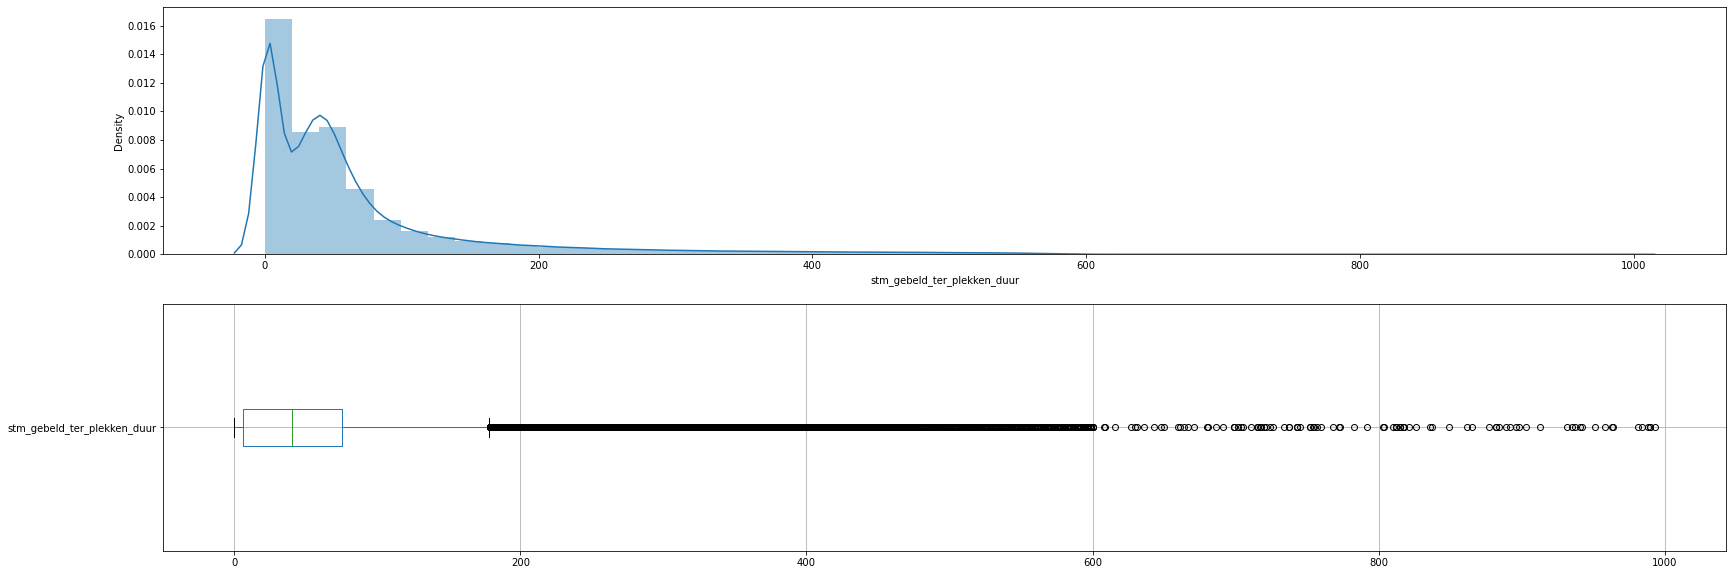

In [40]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(28, 10))
sns.distplot(table.stm_gebeld_ter_plekken_duur, ax = ax1)
table.boxplot(['stm_gebeld_ter_plekken_duur'], ax = ax2, vert=False)

# 5. Targetvariabele: Functie hersteltijd

Onze targetvariabele is om de Functiehersteltijd te voorspellen. We willen graag kunnen voorspellen wanneer een gemelde storing voorbij is, wat ook wel functieherstel wordt genoemd.  

##### 5.1 Overzicht functie hersteltijd duur

We kiezen ervoor om als targetvariable de stm_fh_duur te nemen. Dat is de duur in minuten tussen de melding van de storing tot het functieherstel. We willen op die manier een totalen duur kunnen voorspelen voor de eind gebruiker.


In [41]:
table['stm_fh_duur'].head()

2    51.0
3    40.0
4     6.0
5     7.0
6    13.0
Name: stm_fh_duur, dtype: float64

##### 5.2 Verdeling functie hersteltijd duur

Hier onder geven we de verdeling weer van functie herstel duur. Er is te zien dat de duur niet normaal verdeeld is maar dat er spraken is van een rechts scheve verdeling. <br> Daarnaast zien we dat de duur een x aantal uitschieters heeft, deze uitschieters houden we in de data set omdat deze wat zeggen over de soort storing en uitloop tijden.

<AxesSubplot:>

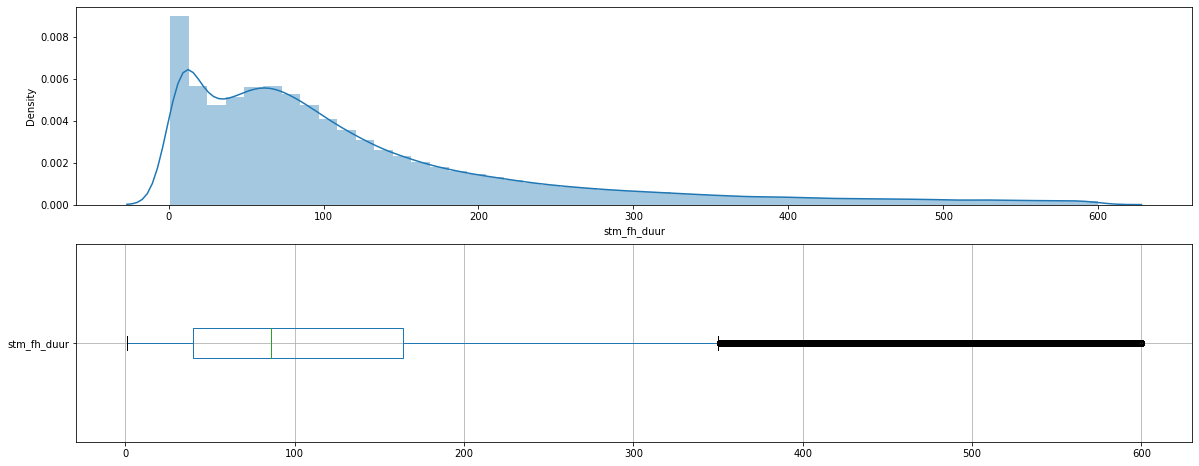

In [42]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20, 8))
sns.distplot(table.stm_fh_duur, ax = ax1)
table.boxplot(['stm_fh_duur'], ax = ax2, vert=False)

# 6. Feature variabele Discrete en Continu

#### 6.1 Overzicht discreete en ratio feature variabele

Hier hebben we een duidelijk overzicht van de mogelijke continu en discrete features .

In [43]:
table.loc[:, table.dtypes == float].sample(3)

stm_km_van_mld  stm_km_tot_mld  stm_km_van_gst  stm_km_tot_gst  \
226694          9422.0             0.0          9422.0             0.0   
222013             0.0             0.0             0.0             0.0   
721689         25760.0             0.0             0.0             0.0   

        stm_progfh_in_duur  stm_progfh_gw_teller  stm_fh_duur  \
226694                15.0                   0.0         63.0   
222013          99999999.0                   0.0         53.0   
721689          99999999.0                   0.0          8.0   

        stm_reactie_duur  stm_meld_gebeld_duur  stm_meld_ter_plekken_duur  \
226694              53.0                   3.0                       56.0   
222013              16.0                   8.0                       24.0   
721689               1.0                   1.0                        2.0   

        stm_gebeld_ter_plekken_duur  
226694                         53.0  
222013                         16.0  
721689                          1.0

Hier onder tonen wat op eerste gezicht een correlatie zal hebben met functie hersteltijd duur. Wat op valt is dat de prognose duur een negatieve correlatie heeft met de functie hertstel tijd van -19%. Daarnaast is er nog 1 kolom  die een zwakke correlatie heeft: prognose teller ~10%.

In [44]:
corr_sample = table.corr()
corr_sample['stm_fh_duur'].sort_values()

stm_progfh_in_duur            -0.194019
stm_tao_telling_mutatie       -0.020679
stm_reactie_duur              -0.013610
#stm_sap_meldnr               -0.008316
stm_meld_gebeld_duur           0.001787
stm_km_van_mld                 0.008044
stm_km_van_gst                 0.022270
stm_km_tot_gst                 0.028999
stm_km_tot_mld                 0.029047
stm_progfh_gw_teller           0.111273
stm_meld_ter_plekken_duur      0.203990
stm_gebeld_ter_plekken_duur    0.769439
stm_fh_duur                    1.000000
Name: stm_fh_duur, dtype: float64

#### 6.2 Functie herstel prognose 

Hier onder vergelijken we de prognose duur en uiteindelijke duur met elkaar. <br> Er is op te merken dat de prognose soms precies klopt en soms ver van de echte functie herstel duur ligt.

In [45]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].sample(5, random_state=2)

stm_progfh_in_duur  stm_fh_duur
360881                 4.0          6.0
346361               160.0        172.0
235162                99.0        275.0
469704          99999999.0        200.0
802170                 0.0         16.0

In [46]:
table['stm_progfh_in_duur'].describe()

count    3.642230e+05
mean     1.892549e+07
std      3.934666e+07
min      0.000000e+00
25%      2.700000e+01
50%      6.500000e+01
75%      2.830000e+02
max      1.060092e+09
Name: stm_progfh_in_duur, dtype: float64

Er is op te merken dat er voorspellingen tussen zitten van 999999 minuten. Zoals hier onder te zien is zal dit het gemiddelde en de verdeling erg aanpassen  

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_progfh_in_duur'>

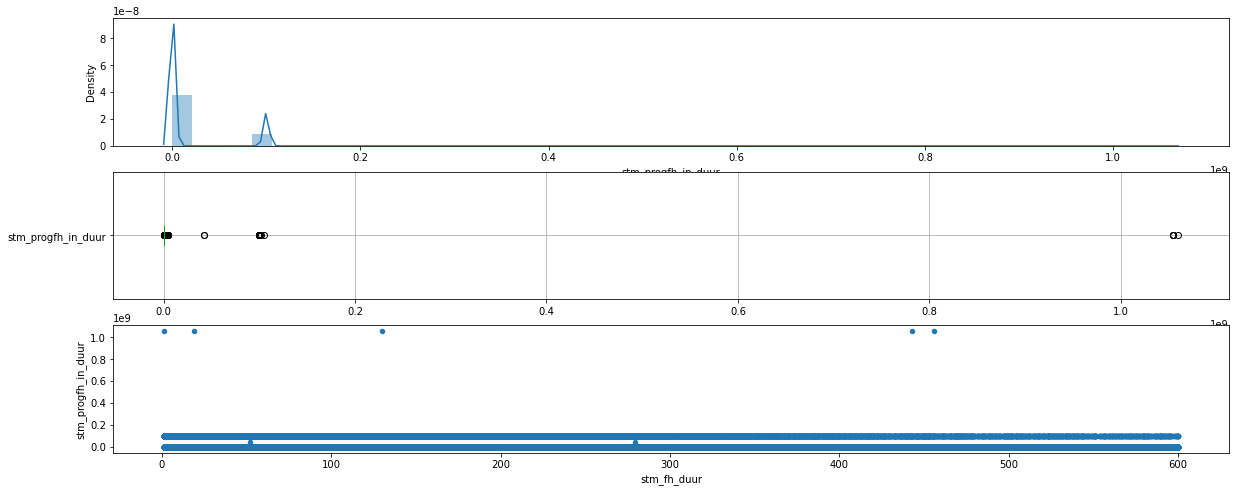

In [47]:
fig, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(20, 8))
sns.distplot(table.stm_progfh_in_duur, ax = ax1)
table.boxplot(['stm_progfh_in_duur'], ax = ax2, vert=False)
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_progfh_in_duur', ax = ax3)

Voor verder onderzoek halen we de 999999 waardes uit de data 

In [48]:
table = table[table['stm_progfh_in_duur'] < 999999]
table.shape

(295320, 37)

Na verder onderzoek is er hier onder te zien dat prognoses boven 900 steeds meer afdwaalt van de uiteindelijke functie herstel tijd. Er kan dus gezegt worden dat prognoses boven de 900 niet relevant zijn voor het model.

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_progfh_in_duur'>

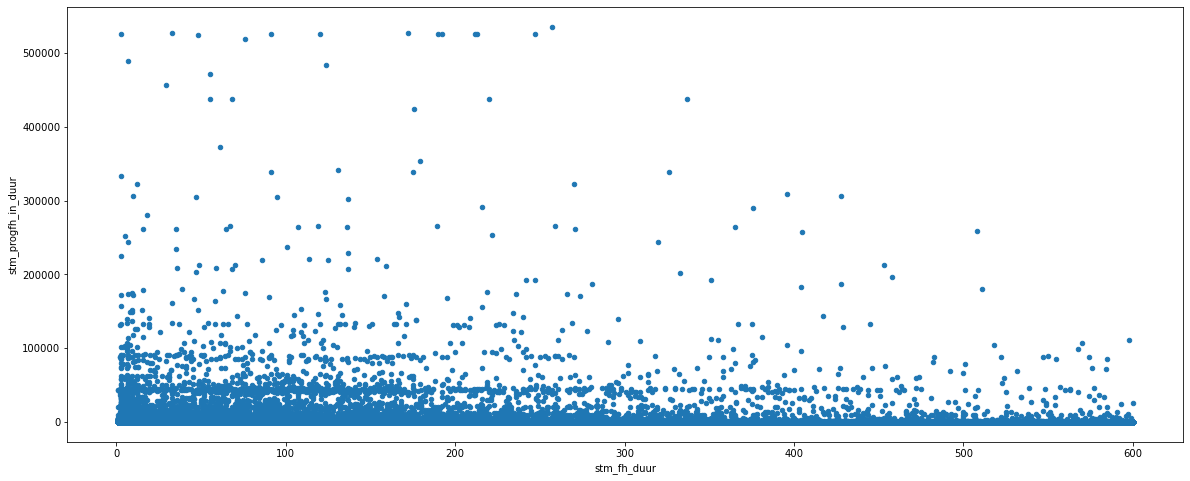

In [49]:
fig, (ax1)= plt.subplots(1,1, figsize=(20, 8))
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_progfh_in_duur', ax = ax1)

In [50]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].loc[(table['stm_progfh_in_duur'])  >= 900].sample(4)

stm_progfh_in_duur  stm_fh_duur
823339              1750.0         57.0
422335             60726.0         12.0
878136              6023.0        263.0
785290             73800.0        128.0

In [51]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].loc[(table['stm_progfh_in_duur'])  < 900].sample(4)

stm_progfh_in_duur  stm_fh_duur
408543                69.0        220.0
861544               262.0        252.0
703816                11.0        189.0
547324                18.0         95.0

Voor verder onderzoek halen we hier onder de prognoses duur boven rijen boven de de 900 uit de dataset

In [52]:
 table = table[table['stm_progfh_in_duur'] <= 900]

In [53]:
table.shape

(286057, 37)

Er is hieronder nu een beter verdeling te zien van prognoses duur. De uitschieters die nu nog in de data zitten zijn relevant voor het bepalen waar een storing soort langer duurt dan prognose.

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_progfh_in_duur'>

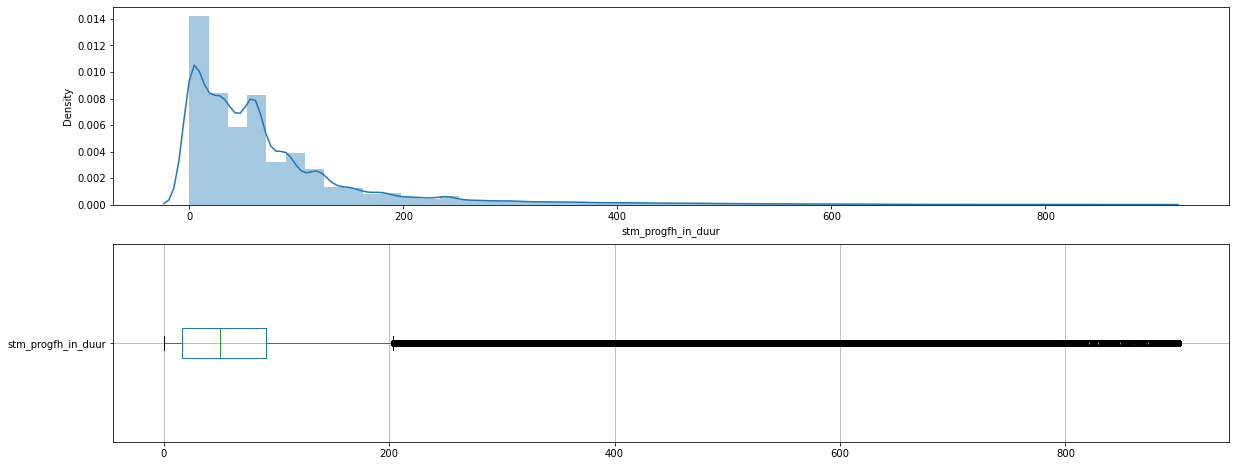

In [54]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20, 8))
sns.distplot(table.stm_progfh_in_duur, ax = ax1)
table.boxplot(['stm_progfh_in_duur'], ax = ax2, vert=False)
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_progfh_in_duur', ax = ax3)

Er is uit de correlatie hier onder te zien dat zonder de verwaarloosde data. de corrolatie naar 43% is.

In [55]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].corr()

stm_progfh_in_duur  stm_fh_duur
stm_progfh_in_duur            1.000000     0.432908
stm_fh_duur                   0.432908     1.000000

#### 6.3 Prognose teller

We gaan hier verder onderzoek dan naar de prognose teller. Er is een kleine 7% corrolatie tussen prognose teller en functie herstel duur.

In [56]:
table[['stm_progfh_gw_teller', 'stm_fh_duur']].corr()

stm_progfh_gw_teller  stm_fh_duur
stm_progfh_gw_teller              1.000000     0.078295
stm_fh_duur                       0.078295     1.000000

Er valt op dat de verschilende prognoses maar 1 item in voor komt en der geen boxplot gemaakt kan worden.

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_progfh_gw_teller'>

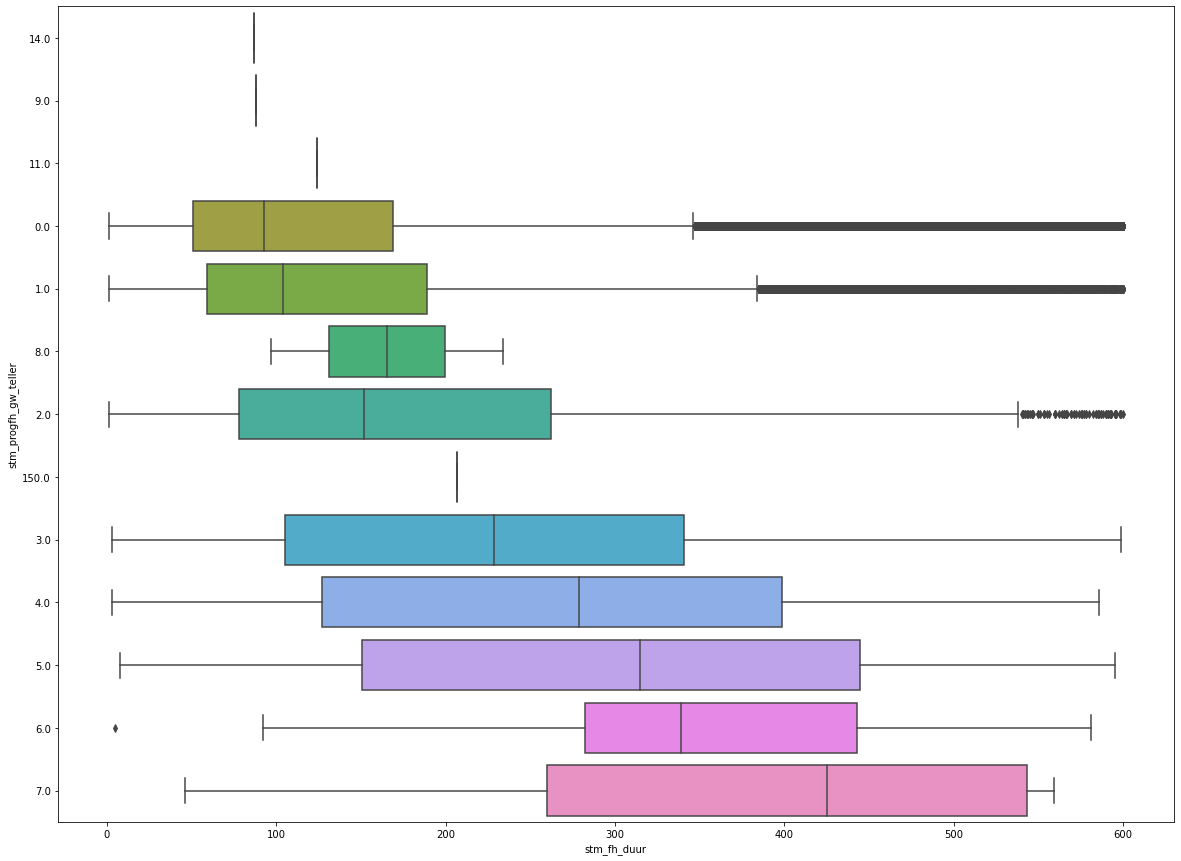

In [57]:
group_prog = table.loc[:,['stm_fh_duur', 'stm_progfh_gw_teller']].groupby(['stm_progfh_gw_teller']).mean().sort_values(by='stm_fh_duur')
plt.figure(figsize=(20, 15))
sns.boxplot(y=table.stm_progfh_gw_teller, x=table.stm_fh_duur, order=group_prog.index, orient="h")

We halen de verschillende prognose met weinig voor komende rijen er uit.

In [58]:
table = table[table['stm_progfh_gw_teller'] != 14]
table = table[table['stm_progfh_gw_teller'] != 9]
table = table[table['stm_progfh_gw_teller'] != 11]
table = table[table['stm_progfh_gw_teller'] != 150]
table = table[table['stm_progfh_gw_teller'] != 8]

Er is te zien dat er wel een gemiddelde functie herstel tijds duur trend in zit.

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_progfh_gw_teller'>

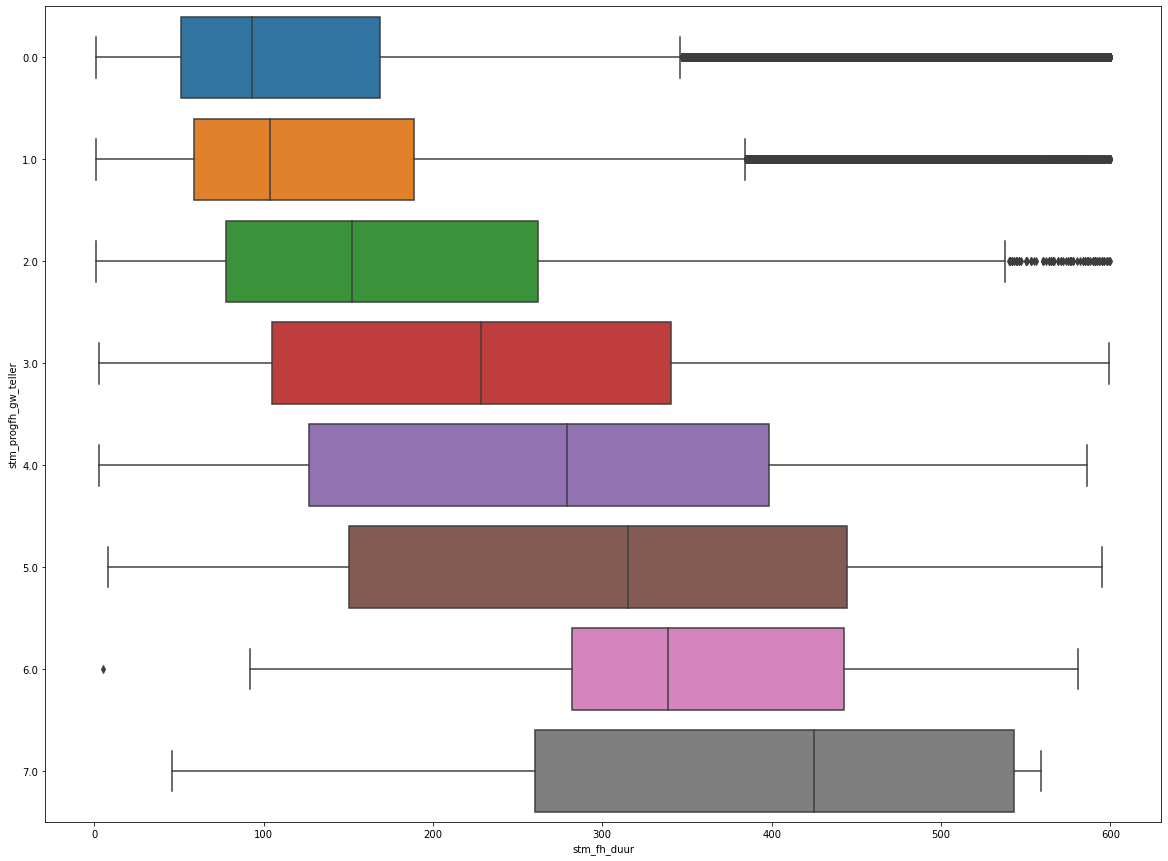

In [59]:
group_prog = table.loc[:,['stm_fh_duur', 'stm_progfh_gw_teller']].groupby(['stm_progfh_gw_teller']).mean().sort_values(by='stm_fh_duur')
plt.figure(figsize=(20, 15))
sns.boxplot(y=table.stm_progfh_gw_teller, x=table.stm_fh_duur, order=group_prog.index, orient="h")

Op eerste gezicht lijkt dit een goede kandidaat voor een feature target. Maar zoals hier onder te zien is de data grotendeels verdeelt over teller 0 en 1. Er is ook te zien dat 0 en 1 gemiddelde naast elkaar liggen. De functie herstel tijd is hetzelfde verdeelt dus zegt het teller kolom niets over het verschil van tijds duur.

In [60]:
table['stm_progfh_gw_teller'].value_counts()

0.0    214293
1.0     65602
2.0      4908
3.0       930
4.0       236
5.0        55
6.0        17
7.0        10
Name: stm_progfh_gw_teller, dtype: int64

In [61]:
table[['stm_progfh_gw_teller', 'stm_fh_duur']].corr()

stm_progfh_gw_teller  stm_fh_duur
stm_progfh_gw_teller              1.000000     0.088538
stm_fh_duur                       0.088538     1.000000

#### 6.3 Melding ter plekken duur

We nemen hier een kijkje in meldeing ter plekken duur. dit is de tijd van af de tijd dat er gebeld is tot de tijd van aankomst van aannemer.

In [62]:
table[['stm_gebeld_ter_plekken_duur', 'stm_fh_duur']].head(4) 

stm_gebeld_ter_plekken_duur  stm_fh_duur
84561                          0.0          7.0
86473                          0.0        232.0
86882                          0.0          8.0
93767                         36.0         18.0

We zien dat er een kleine 8% corrolatie is.

In [63]:
table[['stm_progfh_gw_teller', 'stm_fh_duur']].corr()

stm_progfh_gw_teller  stm_fh_duur
stm_progfh_gw_teller              1.000000     0.088538
stm_fh_duur                       0.088538     1.000000

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_gebeld_ter_plekken_duur'>

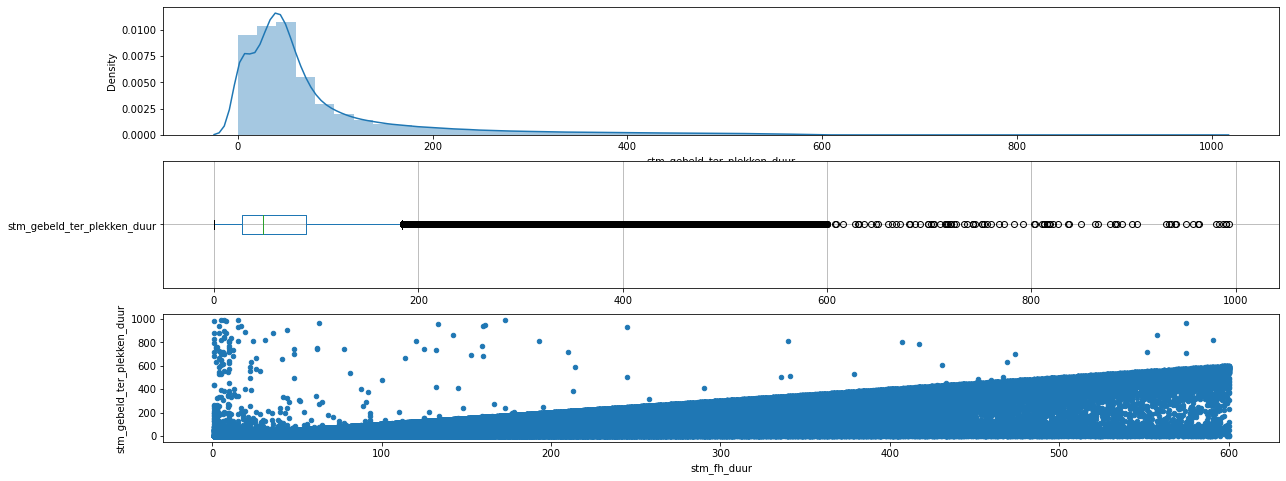

In [64]:
fig, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(20, 8))
sns.distplot(table.stm_gebeld_ter_plekken_duur, ax = ax1)
table.boxplot(['stm_gebeld_ter_plekken_duur'], ax = ax2, vert=False)
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_gebeld_ter_plekken_duur', ax = ax3)

In [65]:
table = table[table['stm_gebeld_ter_plekken_duur'] < 1000]

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_gebeld_ter_plekken_duur'>

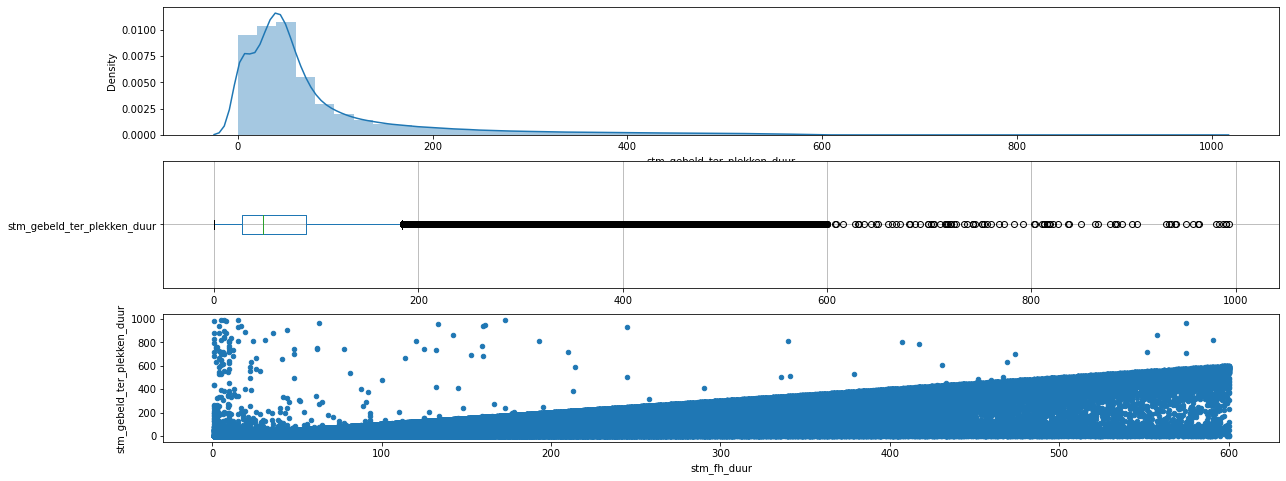

In [66]:
fig, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(20, 8))
sns.distplot(table.stm_gebeld_ter_plekken_duur, ax = ax1)
table.boxplot(['stm_gebeld_ter_plekken_duur'], ax = ax2, vert=False)
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_gebeld_ter_plekken_duur', ax = ax3)

We zien dat na het verwijderen van de tijd boven de 1000 minuten de correlatie toe neemt van 8% tot 80%

In [67]:
table[['stm_gebeld_ter_plekken_duur', 'stm_fh_duur']].corr()

stm_gebeld_ter_plekken_duur  stm_fh_duur
stm_gebeld_ter_plekken_duur                     1.000000     0.803746
stm_fh_duur                                     0.803746     1.000000

## 7. Feature variabele Nominaal

#### 7.1 Overzicht Nominaal variabele

Hier hebben we een duidelijk overzicht van alle nominale features   

In [68]:
table.loc[:, table.dtypes == 'category'].sample(3)

stm_geo_mld stm_geo_mld_uit_functiepl stm_equipm_nr_mld  \
865370         139                     139.0        11609023.0   
230507         135                     135.0        10301554.0   
448233          35                      35.0        10247776.0   

       stm_equipm_soort_mld stm_prioriteit stm_status_melding_sap  \
865370                  TTI            5.0              MINB PAGE   
230507            DETGRSSSL            2.0                   MAFS   
448233              OVERWEG            2.0                   MAFS   

       stm_oh_pg_gst stm_geo_gst stm_equipm_nr_gst stm_equipm_soort_gst  \
865370           07E         139        11609023.0                  TTI   
230507           11S       135.0        10301554.0            DETGRSSSL   
448233           15S        35.0        10247776.0              OVERWEG   

       stm_oorz_groep stm_oorz_code stm_fh_status stm_tao_indicator  \
865370        TECHONV         212.0           1.0                 N   
230507       ONR-DERD         145.0           1.0                 N   
448233        TECHONV         298.0           1.0                 N   

       stm_tao_beinvloedbaar_indicator stm_contractgeb_mld  \
865370                               B                 7.0   
230507                              NB                11.0   
448233                               B                15.0   

         stm_functiepl_mld stm_techn_mld stm_contractgeb_gst stm_techn_gst  
865370  139-202-1000097700             K                 7.0             E  
230507  135-601-1000076591             S                11.0             S  
448233  035-204-1000078527             S                15.0             S

Omdat de functie hersteltijd een niet normale verdeling heeft is het niet mogelijk om een directe relatie te berekenen tussen de categorieën en de functie hersteltijd duur. Er zijn wel technieken deze technieken zijn alleen voor de huidige opdracht tijd en kennis level niet toepasbaar voor dit project.

De nominale kolommen die in de dataset zitten hebben veel categoriale waardes. Voor de modellen is het moeilijk om hier mee over weg te gaan zonder de categorieën 1 van 1 uit te zoeken en daar dummy's van maken. Daar voor in de plaats hebben we  hier gebruik gemaakt van leave one out target encoding.

In [69]:
def give_leave_one_out_encoder(table, column):
    leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
    two_tables = table[column].copy()
    return leave_one_encoder.fit_transform(two_tables[column[0]].astype('category'), two_tables[column[1]])
    

Hier onder bekijken we een voorbeeld hoe de verandering plaats heeft gevonden met de uitkomst. De target encoding werkt als volgt: voor iedere category pak alle duur die er onder valt. Sommeer alle rijen die er onder vallen zonder de huidige rij waarde. Deel het uitkomst door het aantal rows die onder de categorie vallen. Vervolgens neem voor iedere element een standaarddeviatie afwijking van 0.05, deze afwijking wordt genomen om over fitting te voorkomen.

In [70]:
Example_table = table[['stm_oorz_groep', 'stm_fh_duur']].copy()
Example_table['stm_oorz_groep_looe_mean'] = give_leave_one_out_encoder(Example_table, ['stm_oorz_groep', 'stm_fh_duur'])

In [71]:
Example_table.sample(4)

stm_oorz_groep  stm_fh_duur  stm_oorz_groep_looe_mean
628402        TECHONV        233.0                153.592539
454044        TECHONV         77.0                136.734353
385642       ONR-DERD        156.0                122.320905
251589       ONR-DERD        107.0                131.890396

#### 7.2 Oorzaak groep

Hier onder is te zien dat oorzaak groep heeft 4 categorien bevat, 

In [72]:
table.stm_oorz_groep.value_counts()

TECHONV     180190
ONR-DERD     59215
ONR-RIB      31410
WEER         15236
Name: stm_oorz_groep, dtype: int64

Hier onder is er te zien dat de verdeling van duur niet erg verspreid is. Het gemiddelde ligt dicht op elkaar

<AxesSubplot:title={'center':'stm_fh_duur'}, xlabel='[stm_oorz_groep]'>

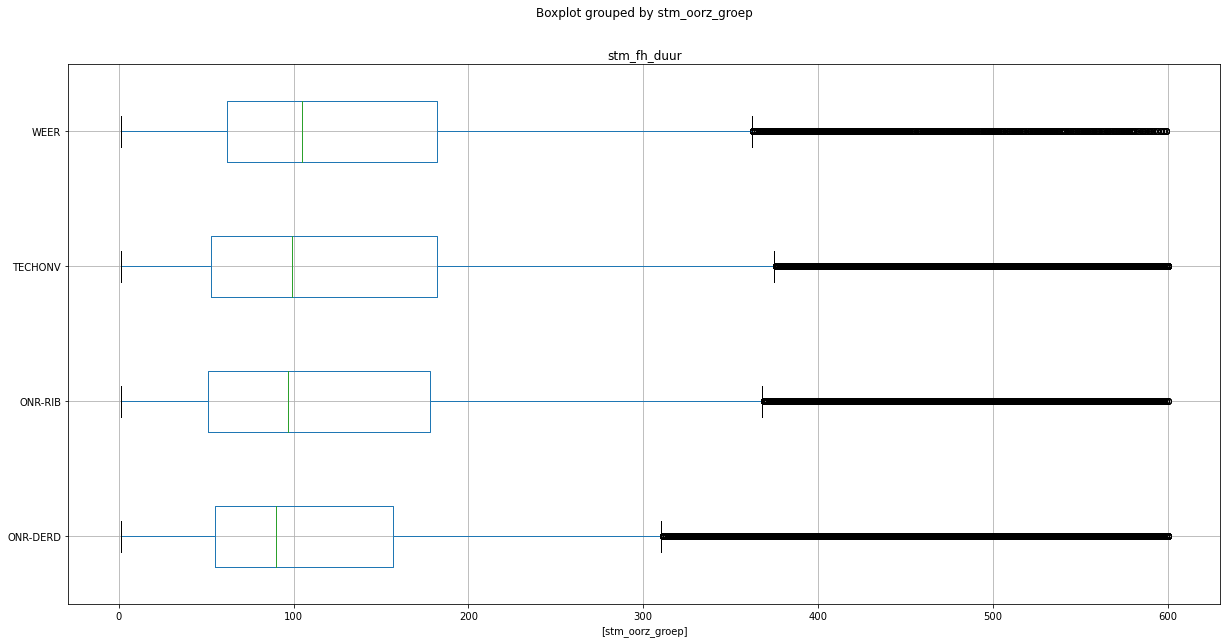

In [73]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,10))
table.boxplot(column=['stm_fh_duur'], by=['stm_oorz_groep'], ax = ax1, vert=False)

In [74]:
table['stm_oorz_groep_looe_mean'] = give_leave_one_out_encoder(table, ['stm_oorz_groep', 'stm_fh_duur'])
table[['stm_oorz_groep_looe_mean', 'stm_fh_duur', 'stm_oorz_groep']].head(5)

stm_oorz_groep_looe_mean  stm_fh_duur stm_oorz_groep
84561                138.980428          7.0        TECHONV
86473                124.712519        232.0        ONR-RIB
86882                139.474078          8.0        ONR-RIB
93767                121.941991         18.0       ONR-DERD
95489                131.630210        195.0        TECHONV

Zoals hierboven te zien is verschillen functie herstel waardes niet erg van elkaar. Dat was op eerste gezicht ook te zien in de box plot.. Dit zorgt dat oorzaak geen goede kandidaat is als feature

##### 7.3 Oorzaak code

We gaan oorzaak code hieronder verder onderzoeken. Er is te zien dat er meer categorieën zijn en er een betere verdeling is van functies herstel tijd duur.

In [75]:
print('Totaal: ', table['stm_oorz_code'].value_counts().count())
table['stm_oorz_code'].value_counts().head(6)

Totaal:  76


221.0    41951
218.0    34119
215.0    31953
133.0    15500
145.0    15403
135.0    14753
Name: stm_oorz_code, dtype: int64

In [76]:
table[['stm_oorz_code', 'stm_fh_duur']].head(5) 

stm_oorz_code  stm_fh_duur
84561         299.0          7.0
86473         133.0        232.0
86882         133.0          8.0
93767         142.0         18.0
95489         215.0        195.0

Hier onder is er te zien dat elke categorie veel uitschieters bevatten dat zegt niet meteen dat dit ook echt uitschieters zijn in de gehele data maar van de onderliggende categorie. Er is te zien dat het functie herstel tijd duur van de categorieën ongeveer het zelfde gemiddelde hebben.

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_oorz_code'>

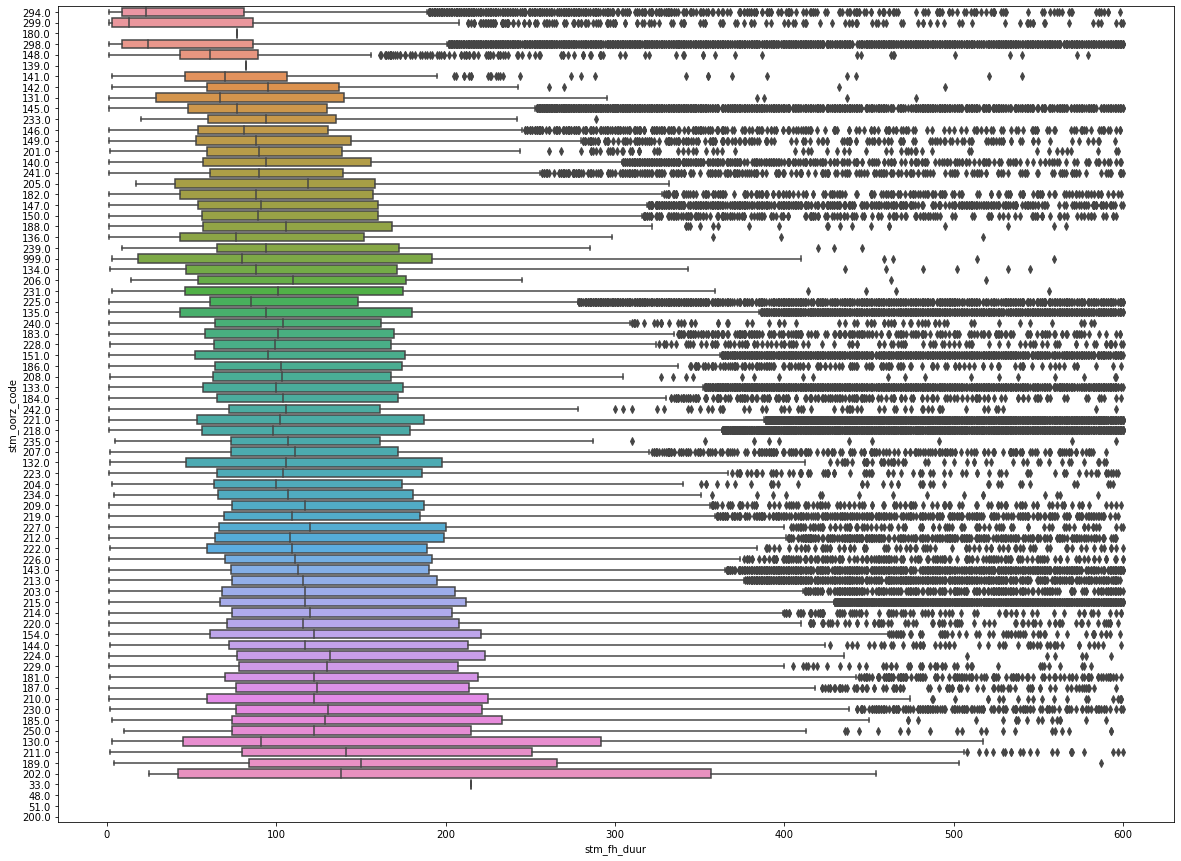

In [77]:
group_oorz = table.loc[:,['stm_fh_duur', 'stm_oorz_code']].groupby(['stm_oorz_code']).mean().sort_values(by='stm_fh_duur')
plt.figure(figsize=(20, 15))
sns.boxplot(y=table.stm_oorz_code, x=table.stm_fh_duur, order=group_oorz.index, orient="h")

Er is hier onder een iets groter verschil te zie per categorie maar de veranding is te klein om daar nuttige informatie uit te halen

In [78]:
table['stm_oorz_groep_looe_mean'] = give_leave_one_out_encoder(table, ['stm_oorz_groep', 'stm_fh_duur'])
table[['stm_oorz_groep_looe_mean', 'stm_fh_duur', 'stm_oorz_code']].sample(4)

stm_oorz_groep_looe_mean  stm_fh_duur stm_oorz_code
463698                137.188426        140.0         135.0
378042                130.663838        270.0         207.0
672720                123.015709        177.0         151.0
568827                115.160507        316.0         143.0

##### 7.4  Equipment nummer

Voor iedere storing is er specifieke materialen die er nodig zijn voor de storing we nemen hier een kijken naar de verdeeling.

Hier onder bekijken we de equipment nummer. de totaal count ligt vrij hoog.

In [79]:
print('Totaal: ', table.stm_equipm_nr_mld.value_counts().count())
table.stm_equipm_nr_mld.value_counts()

Totaal:  71951


None          50837
11241228.0      655
10590754.0      634
10761152.0      570
10732491.0      534
              ...  
10600192.0        0
11320141.0        0
10136975.0        0
10251710.0        0
10288032.0        0
Name: stm_equipm_nr_mld, Length: 71951, dtype: int64

In [80]:
# group_oorz = table.loc[:,['stm_fh_duur', 'stm_equipm_nr_mld']].groupby(['stm_equipm_nr_mld']).median().sort_values(by='stm_fh_duur')
# plt.figure(figsize=(20, 15))
# sns.boxplot(y=table.stm_oorz_code, x=table.stm_fh_duur, order=group_oorz.index, orient="h")

Hier onder maken we een target encoding om te kijken waar de gemiddelde van iedere nummer ligt. Er is te zien dat het tussen 160 en 110 valt. Het verschil ligt niet erg hoog het zal daarom ook niet veel zeggen over de verdeling van functie herstel duur

In [81]:
leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_equipm_nr_mld_looe_mean'] = leave_one_encoder.fit_transform(table['stm_equipm_nr_mld'].astype('category'), table['stm_fh_duur'])

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_equipm_nr_mld_looe_mean'>

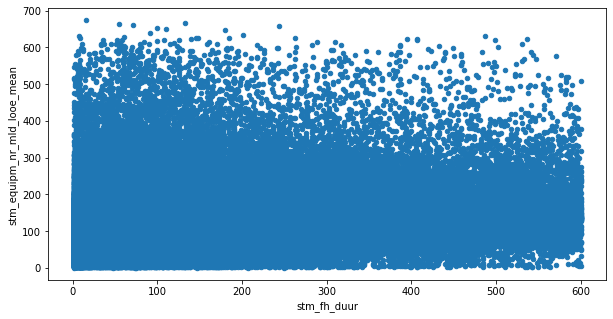

In [82]:
fig, (ax1)= plt.subplots(1,1, figsize=(10, 5))
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_equipm_nr_mld_looe_mean', ax = ax1)

##### 7.5 Equipment soort

We nemen een kijken in stm_equipm_soort_mld dit zijn de verschillende soorten materialen die er nodig zijn voor de storing.

Hier onder zie we een count van het totaal aantal equipment soort categorieën.

In [83]:
table['stm_equipm_soort_mld'].value_counts().count()

442

In [84]:
table['stm_equipm_soort_mld'].value_counts().head(6)

None          50839
WISSEL        41693
OVERWEG       31776
SEIN          25341
DETGRSSSL     13537
DETECTREIN     9709
Name: stm_equipm_soort_mld, dtype: int64

Er is een redelijke verdeling te zien tussen de aantal verschillende categorieën en de aantal voorkomende rijen.

<AxesSubplot:>

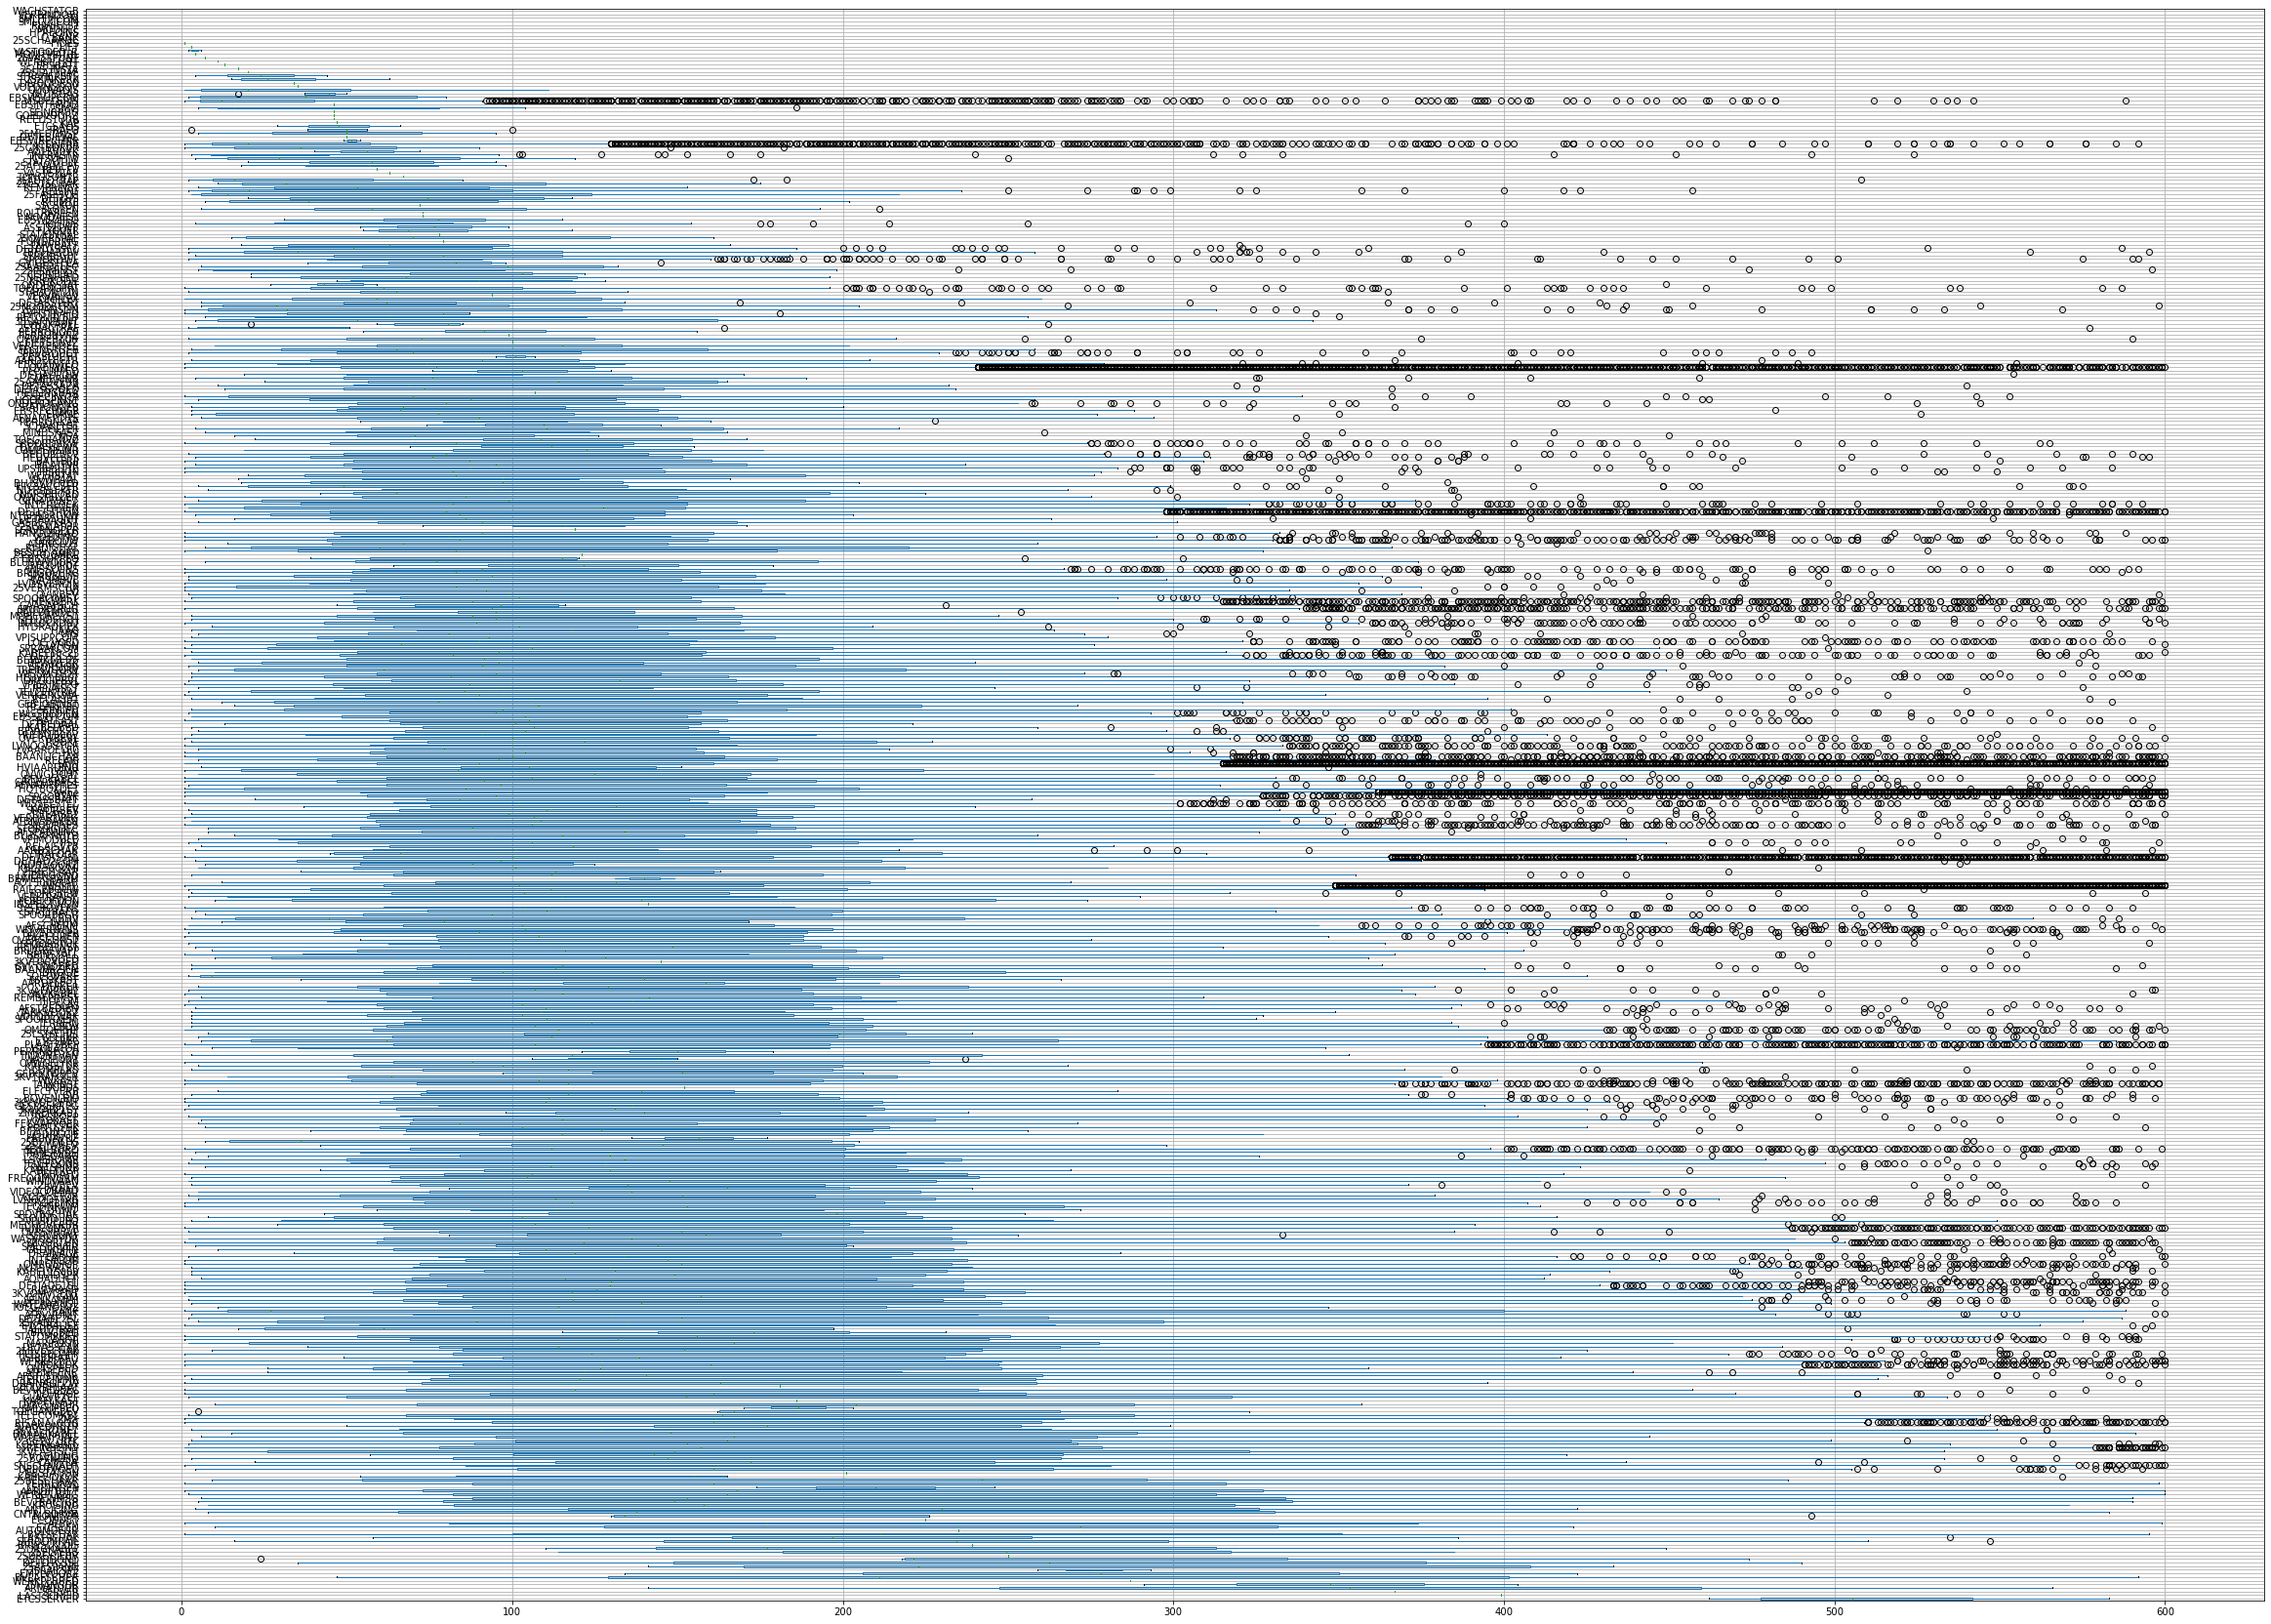

In [85]:
table2 = pd.DataFrame({col:vals['stm_fh_duur'] for col,vals in table.groupby(["stm_equipm_soort_mld"])})
meds = table2.mean()
meds.sort_values(ascending=False, inplace=True)
table2 = table2[meds.index]
fig, (ax1) = plt.subplots(1,1, figsize=(40,30))
table2.boxplot(ax = ax1, vert=False)

Er valt op dat er lege waardes tussen zitten die halen we eruit voor een duidelijker beeld. Er is daar door een lichtelijke van gemiddelde van functies herstel duur toe neemt. Dit kolom zou wel wat kunnen zeggen over de functie hersteltijd.

In [86]:
value_counts = table['stm_equipm_soort_mld'].value_counts()  
table['stm_equipm_soort_mld'].replace((value_counts[value_counts <= 1].index), np.nan, inplace=True)

<AxesSubplot:>

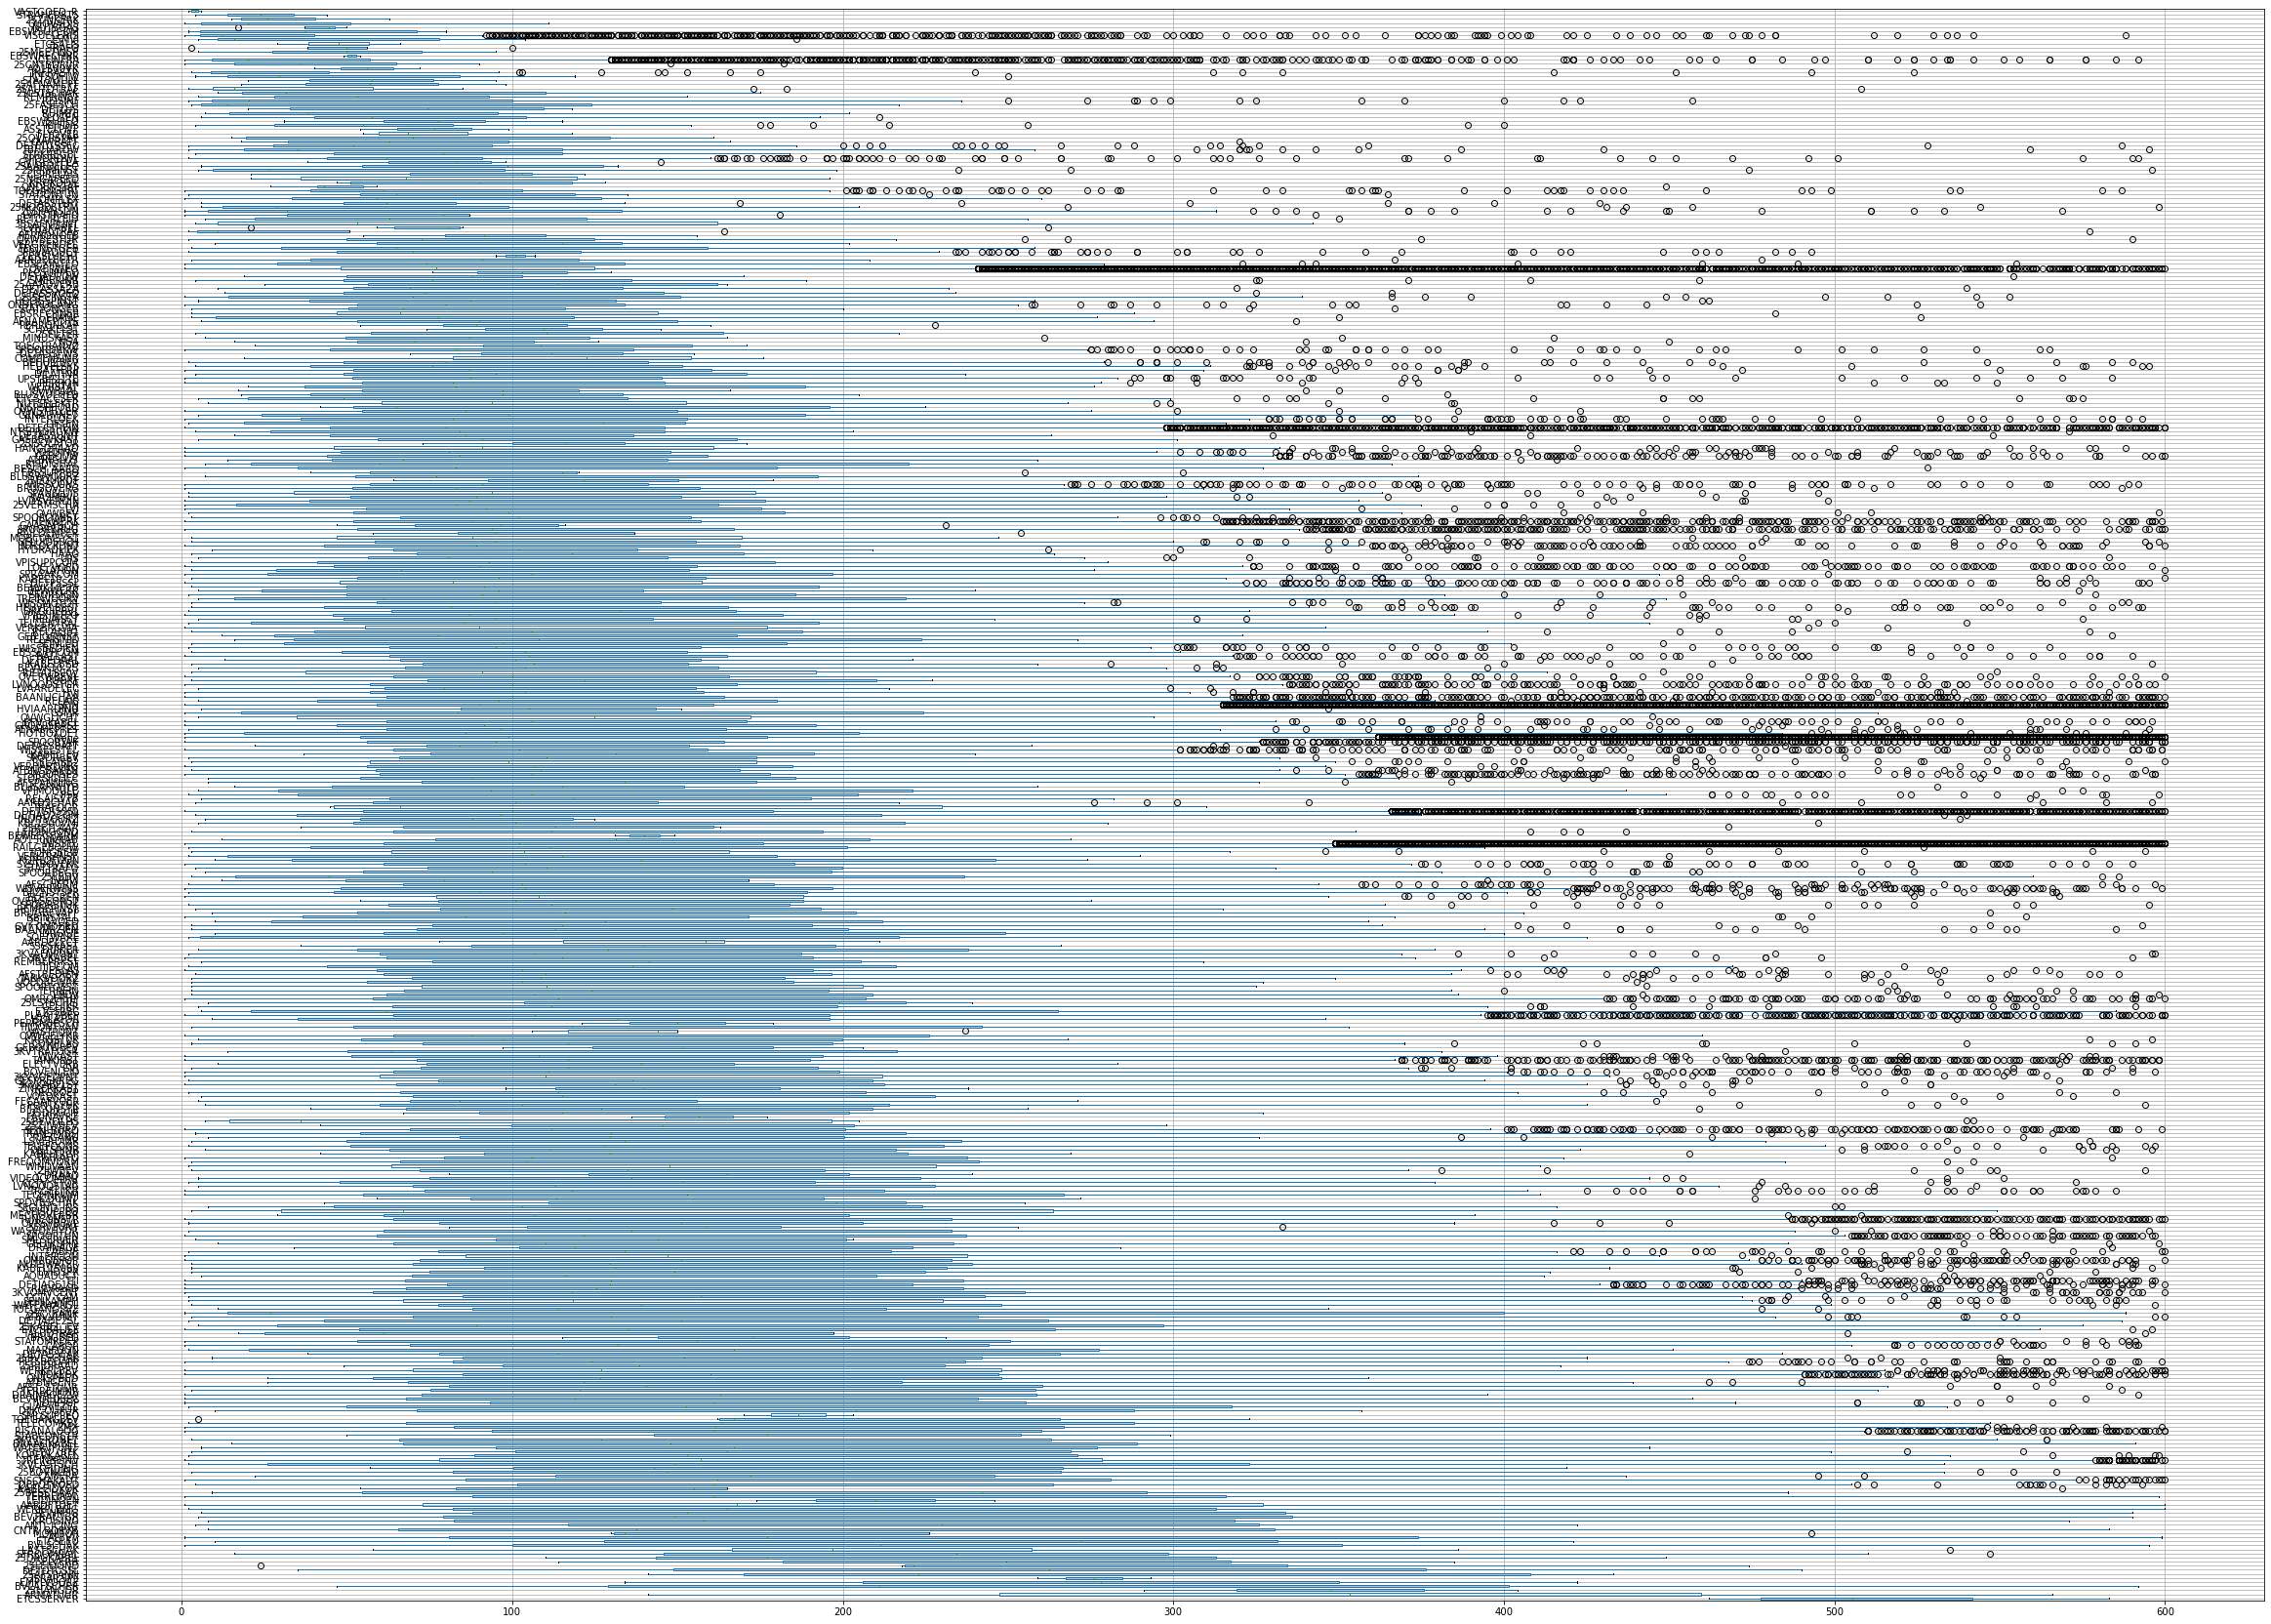

In [87]:
table2 = pd.DataFrame({col:vals['stm_fh_duur'] for col,vals in table.groupby(["stm_equipm_soort_mld"])})
meds = table2.mean()
meds.sort_values(ascending=False, inplace=True)
table2 = table2[meds.index]
fig, (ax1) = plt.subplots(1,1, figsize=(40,30))
table2.boxplot(ax = ax1, vert=False)

In [88]:
leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_equipm_soort_mld_looe_mean'] = leave_one_encoder.fit_transform(table['stm_equipm_soort_mld'].astype('category'), table['stm_fh_duur'])

Er is ook op te merken dat de leave one out encoder een beter beeld geeft over de functie herstel tijd duur.

In [89]:
table[['stm_equipm_soort_mld_looe_mean', 'stm_fh_duur']].sample(5)

stm_equipm_soort_mld_looe_mean  stm_fh_duur
790400                       48.733573        245.0
448830                      111.162362         74.0
410437                      178.687662         81.0
363777                      183.921984        345.0
708129                      125.399849          9.0

#### 7.6  Prioriteit

We nemen een kijken in stm_prioriteit dit is de prioriteit van een bepaalde storing

We zien hieronder dat de prioriteit een betere verdeling heeft van functie hersteltijd. Ondanks de grote aantal uitschieters is er te zien dat de gemiddelde functie hersteltijd verschilt per prioriteit.

<AxesSubplot:>

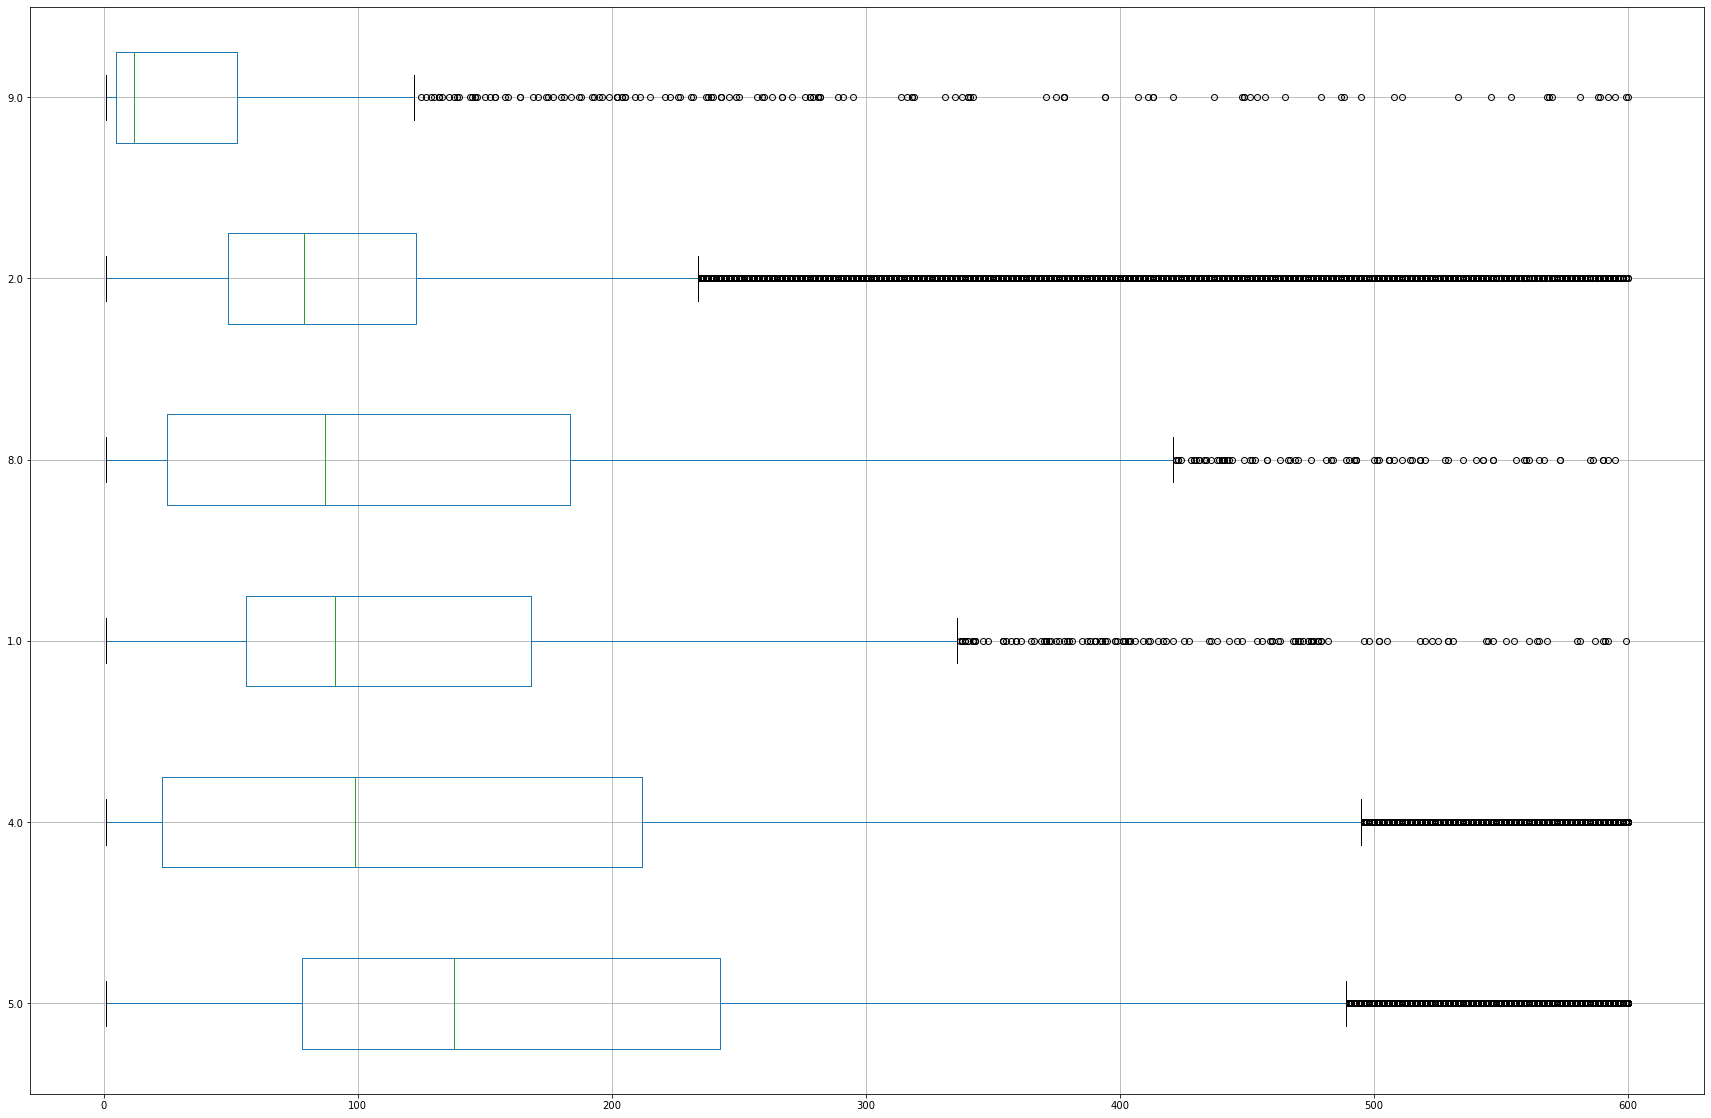

In [90]:
table2 = pd.DataFrame({col:vals['stm_fh_duur'] for col,vals in table.groupby(["stm_prioriteit"])})
meds = table2.mean()
meds.sort_values(ascending=False, inplace=True)
table2 = table2[meds.index]
fig, (ax1) = plt.subplots(1,1, figsize=(30,20))
table2.boxplot(ax = ax1, vert=False)

Er valt bij nader onder zoek te zien dat grotendeels van de data verdeelt is over 2 punten die te dicht bij elkaar liggen van gemiddelde functie herstel tijd.

In [91]:
print("Totaal: ", table.shape[0])
table['stm_prioriteit'].value_counts()

Totaal:  286051


2.0    131013
5.0    102594
4.0     47440
8.0      2299
1.0      1798
9.0       907
Name: stm_prioriteit, dtype: int64

In [92]:
leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_prioriteit_looe_mean'] = leave_one_encoder.fit_transform(table['stm_prioriteit'].astype('category'), table['stm_fh_duur'])

Er is hier ook te zien dat de encoding niet veel zegt over de echte functie hersteltijd.

In [93]:
table[['stm_prioriteit_looe_mean', 'stm_fh_duur']].sample(5)

stm_prioriteit_looe_mean  stm_fh_duur
283651                 92.790048         78.0
687135                104.999823        173.0
382191                183.647924        215.0
326527                106.600132         69.0
459125                181.568839        210.0

#### 7.6  Techniek melding

We nemen een kijken in stm_techn_mld dit zijn de techniek soorten voor een storing.

Hier onder gaan we kijken naar de verschuilende categorieën en de functie herstel tijd verdeeling.

Er zitten wel vier categorien in "H A X M I" die een klein aantal hebben maar we zien hier verder dat de verdling van functie herstel tijd over de veschilende catagorien redelijk goed verdeelt is. 

In [94]:
print("Totaal: ", table.shape[0])
table['stm_techn_mld'].value_counts()

Totaal:  286051


S       99185
B       63500
None    50621
T       20680
E       20229
K       14564
O        9515
P        4671
G        2393
I         300
M         242
X         133
A          17
H           1
Name: stm_techn_mld, dtype: int64

<AxesSubplot:>

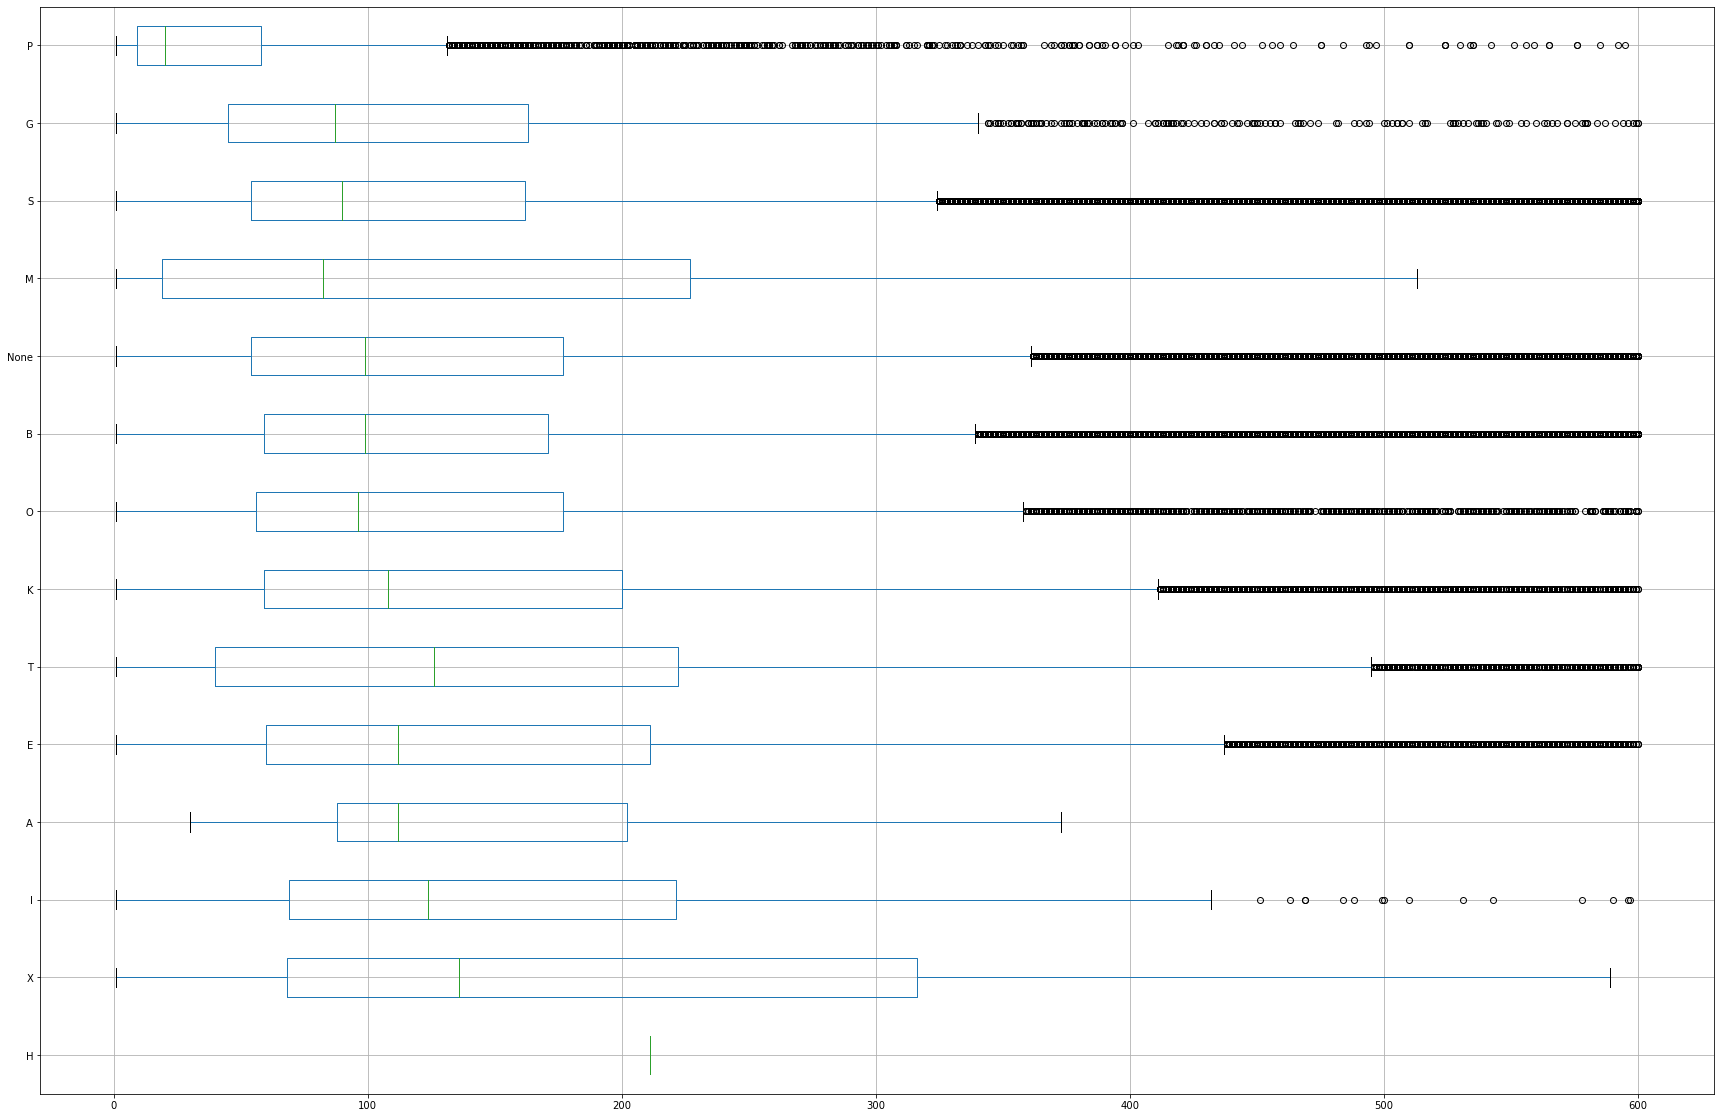

In [95]:
table2 = pd.DataFrame({col:vals['stm_fh_duur'] for col,vals in table.groupby(["stm_techn_mld"])})
meds = table2.mean()
meds.sort_values(ascending=False, inplace=True)
table2 = table2[meds.index]
fig, (ax1) = plt.subplots(1,1, figsize=(30,20))
table2.boxplot(ax = ax1, vert=False)

In [96]:
leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_techn_mld_looe_mean'] = leave_one_encoder.fit_transform(table['stm_techn_mld'].astype('category'), table['stm_fh_duur'])

In [97]:
table[['stm_techn_mld_looe_mean', 'stm_fh_duur']].sample(5)

stm_techn_mld_looe_mean  stm_fh_duur
425506               149.098793        180.0
490896               121.050631        123.0
483406               141.218646        127.0
435066               129.394607        117.0
208091               131.490282        180.0

#### 7.8 Mee genomen features

Na het onderzoek op de features die er gekozen zij met busnnis understanding en een kijk in de data zelf. Is er te zien dat er behalve de prognoses en de Melding ter plekken duur weinig features een sterke relatie of correlatie hebben met functie herstel tijd.

We nemen de vier relatief sterkste features mee in de modelen.

- 1. Techniek veld encoded
- 2. Equipment soort encoded
- 3. Prognose duur
- 4. Melding ter plekken duur